In [1]:
import pandas as pd
import numpy as np

# Import review_data_subset
raw = pd.read_csv('review_data_subset.csv')
data = raw[['verified', 'reviewText']]
True_False = {False: 0, True: 1}
data.replace({"verified": True_False}, inplace = True)
corpus = data['reviewText'].values
labels = data['verified'].values

# Import preprocessed data
X = pd.read_csv('vectorized_corpus.csv', index_col = 0)
X = X.values

df = pd.DataFrame(list(zip(labels, X)), columns = ['verified', 'vectorized_corpus'])

from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

# Split into training and testing
X_train = train.iloc[:, 1]
X_test = test.iloc[:, 1]
y_train = train.iloc[:, 0]
y_test = test.iloc[:, 0]

# array of array incurs error with logistic regression. 
# need to apply the following transformation to X_test and X_train and make them multidimensional arrays.
def series_to_array(series):
    L = []
    for i in series:
        l = []
        for a in i: 
            l.append(a)
        L.append(l)
    return np.array(L)

X_train_array = series_to_array(X_train)
X_test_array = series_to_array(X_test)

C:\Users\wang-\ML\my_env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\wang-\ML\my_env\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [2]:
X_train

21891    [-0.030444112, 0.0777582, -0.015858818, -0.006...
80384    [-0.06379628, 0.15973248, -0.114328556, -0.108...
26175    [-0.047247935, 0.14710723, -0.12584409, -0.135...
76483    [-0.06455474, 0.13950218, -0.07524183, -0.1000...
58304    [-0.16359, 0.17215, 0.23634, -0.29095, 0.15401...
                               ...                        
64853    [-0.083881706, 0.28280753, -0.17911276, -0.031...
94126    [-0.037849393, 0.14506447, -0.049981672, -0.08...
86058    [0.00974114, 0.14838533, -0.079347156, -0.1575...
87714    [-0.13178, 0.32677, -0.31246, -0.2701, -0.1216...
31688    [-0.03583706, 0.15932769, -0.16451104, -0.1012...
Name: vectorized_corpus, Length: 75000, dtype: object

https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [111]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [60]:
# 1 hidden layer and dropout
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation = "relu"))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [61]:
model.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
            metrics = ["accuracy"])

In [62]:
history = model.fit(X_train_array, y_train, epochs = 100)

Epoch 1/100
2344/2344 [==============================] - 13s 5ms/step - loss: 0.4630 - accuracy: 0.7889
Epoch 2/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.4465 - accuracy: 0.7995
Epoch 3/100
2344/2344 [==============================] - 12s 5ms/step - loss: 0.4415 - accuracy: 0.8023
Epoch 4/100
2344/2344 [==============================] - 12s 5ms/step - loss: 0.4368 - accuracy: 0.8059
Epoch 5/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.4337 - accuracy: 0.8064
Epoch 6/100
2344/2344 [==============================] - 12s 5ms/step - loss: 0.4306 - accuracy: 0.8091
Epoch 7/100
2344/2344 [==============================] - 12s 5ms/step - loss: 0.4283 - accuracy: 0.8098
Epoch 8/100
2344/2344 [==============================] - 13s 6ms/step - loss: 0.4252 - accuracy: 0.8112
Epoch 9/100
2344/2344 [==============================] - 12s 5ms/step - loss: 0.4236 - accuracy: 0.8107
Epoch 10/100
2344/2344 [==============================] - 12s 5m

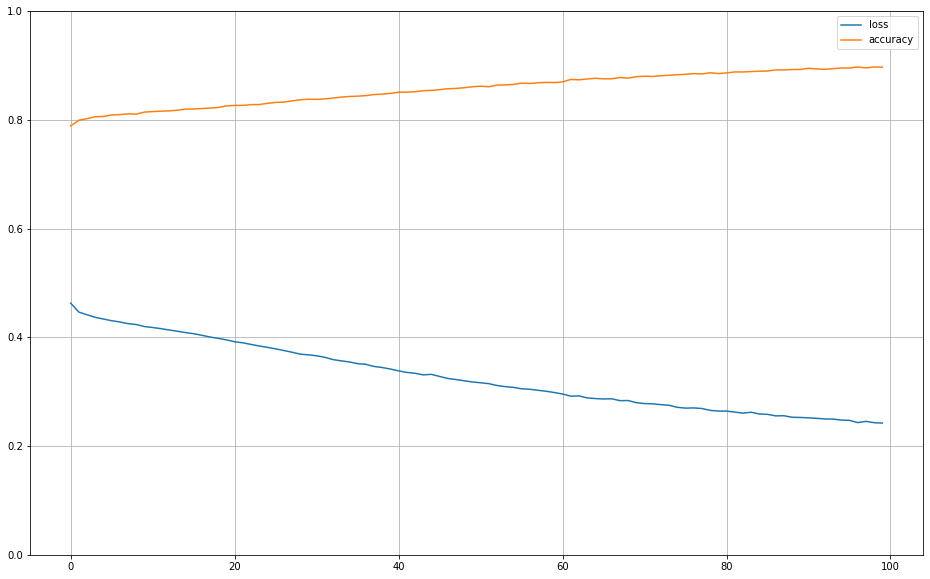

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
model.evaluate(X_test_array, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.7539 - accuracy: 0.7981


[0.7539011836051941, 0.7981200218200684]

In [34]:
X_new = X_test_array[:3]
y_proba = model.predict(X_new)

In [35]:
y_proba

array([[0.97933644],
       [0.07054912],
       [0.6270758 ]], dtype=float32)

In [37]:
y_test[0:3]

80613    1
55296    0
16327    1
Name: verified, dtype: int64

In [38]:
X_test[0:3]

80613    [-0.13199, 0.15186, -0.65313, -0.42774, -0.020...
55296    [-0.05046293, 0.15096699, -0.09452707, -0.0667...
16327    [-0.036320366, 0.09291799, -0.132933, -0.06805...
Name: vectorized_corpus, dtype: object

### Test on simpler model

In [56]:
# No hidden no dropout
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
            metrics = ["accuracy"])

In [57]:
history = model.fit(X_train_array, y_train, epochs = 100)

Epoch 1/100
2344/2344 [==============================] - 17s 7ms/step - loss: 0.4656 - accuracy: 0.7869
Epoch 2/100
2344/2344 [==============================] - 23s 10ms/step - loss: 0.4478 - accuracy: 0.7994
Epoch 3/100
2344/2344 [==============================] - 23s 10ms/step - loss: 0.4415 - accuracy: 0.8018
Epoch 4/100
2344/2344 [==============================] - 16s 7ms/step - loss: 0.4363 - accuracy: 0.8033
Epoch 5/100
2344/2344 [==============================] - 15s 7ms/step - loss: 0.4326 - accuracy: 0.8061
Epoch 6/100
2344/2344 [==============================] - 15s 6ms/step - loss: 0.4289 - accuracy: 0.8076
Epoch 7/100
2344/2344 [==============================] - 15s 7ms/step - loss: 0.4249 - accuracy: 0.8088
Epoch 8/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.4214 - accuracy: 0.8107
Epoch 9/100
2344/2344 [==============================] - 15s 6ms/step - loss: 0.4182 - accuracy: 0.8122
Epoch 10/100
2344/2344 [==============================] - 16s 

2344/2344 [==============================] - 11s 5ms/step - loss: 0.2564 - accuracy: 0.8956
Epoch 80/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.2558 - accuracy: 0.8975
Epoch 81/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.2556 - accuracy: 0.8978
Epoch 82/100
2344/2344 [==============================] - 12s 5ms/step - loss: 0.2518 - accuracy: 0.8979
Epoch 83/100
2344/2344 [==============================] - 10s 4ms/step - loss: 0.2513 - accuracy: 0.9007
Epoch 84/100
2344/2344 [==============================] - 10s 4ms/step - loss: 0.2501 - accuracy: 0.8999
Epoch 85/100
2344/2344 [==============================] - 10s 4ms/step - loss: 0.2486 - accuracy: 0.9000
Epoch 86/100
2344/2344 [==============================] - 10s 4ms/step - loss: 0.2474 - accuracy: 0.9015
Epoch 87/100
2344/2344 [==============================] - 10s 4ms/step - loss: 0.2459 - accuracy: 0.9026
Epoch 88/100
2344/2344 [==============================] - 12s 5ms/st

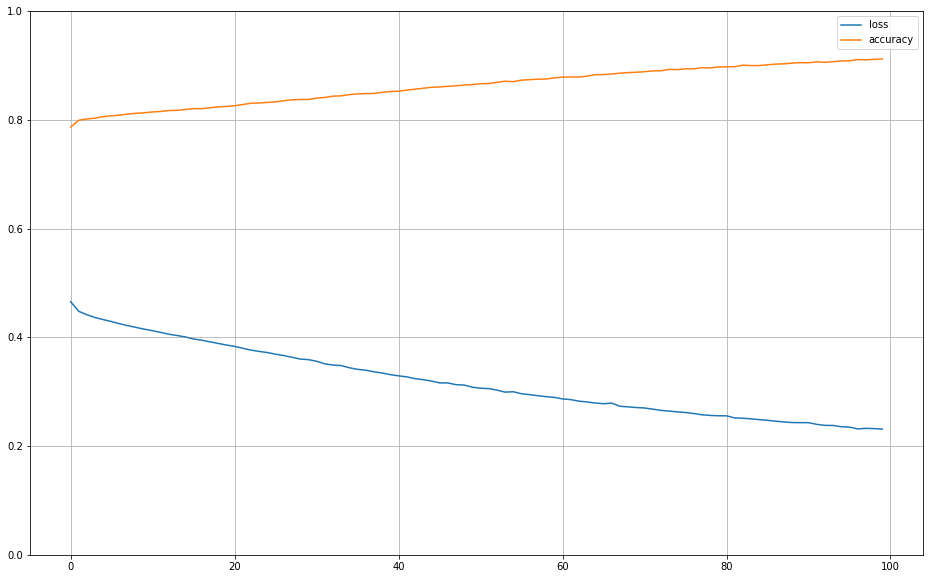

In [58]:
pd.DataFrame(history.history).plot(figsize = (16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
model.evaluate(X_test_array, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.7841 - accuracy: 0.7843


[0.7841097116470337, 0.7843199968338013]

Both models trained using about the same amount of time. 
The simple model obviously overfitted beyond 80% accuracy.



https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

In [69]:
# add dropout prior to inputting into first layer
model = keras.models.Sequential()
model.add(Dropout(0.2, input_shape =(300,)))
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(Dropout(0.2))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [70]:
model.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
            metrics = ["accuracy"])

In [71]:
history = model.fit(X_train_array, y_train, epochs = 100)

Epoch 1/100
2344/2344 [==============================] - 15s 6ms/step - loss: 0.4749 - accuracy: 0.7801
Epoch 2/100
2344/2344 [==============================] - 19s 8ms/step - loss: 0.4579 - accuracy: 0.7929
Epoch 3/100
2344/2344 [==============================] - 21s 9ms/step - loss: 0.4522 - accuracy: 0.7957
Epoch 4/100
2344/2344 [==============================] - 17s 7ms/step - loss: 0.4479 - accuracy: 0.7990
Epoch 5/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.4439 - accuracy: 0.8013
Epoch 6/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.4432 - accuracy: 0.8014
Epoch 7/100
2344/2344 [==============================] - 14s 6ms/step - loss: 0.4411 - accuracy: 0.8025
Epoch 8/100
2344/2344 [==============================] - 13s 6ms/step - loss: 0.4381 - accuracy: 0.8041
Epoch 9/100
2344/2344 [==============================] - 16s 7ms/step - loss: 0.4369 - accuracy: 0.8062
Epoch 10/100
2344/2344 [==============================] - 21s 9m

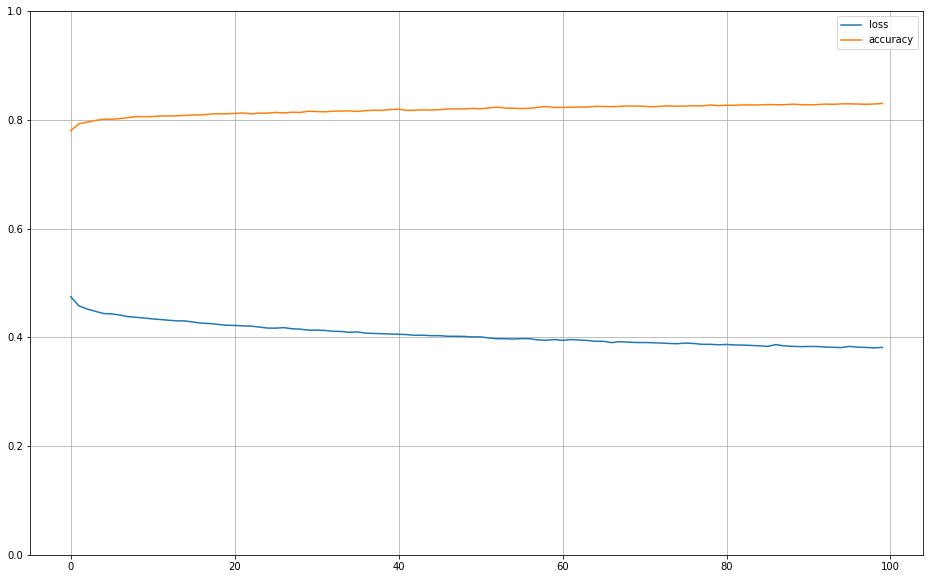

In [72]:
pd.DataFrame(history.history).plot(figsize = (16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [73]:
model.evaluate(X_test_array, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.4889 - accuracy: 0.7979


[0.4888729155063629, 0.7978799939155579]

In [ ]:
# Create validation set to monitor training process and avoid overfitting

X_valid = train.iloc[-7500:, 1]
y_valid = train.iloc[-7500:, 0]

X_train = train.iloc[0: -7500, 1]
y_train = train.iloc[0: -7500, 0]
X_valid = series_to_array(X_valid)
X_train = series_to_array(X_train)

In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [78]:
model.compile(loss = "binary_crossentropy", 
             optimizer = "sgd", 
            metrics = ["accuracy"])

In [96]:
history = model.fit(X_train, y_train, epochs = 100, 
                   validation_data = (X_valid, y_valid))

Epoch 1/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.4176 - accuracy: 0.8144 - val_loss: 0.4155 - val_accuracy: 0.8077
Epoch 2/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.4177 - accuracy: 0.8137 - val_loss: 0.4165 - val_accuracy: 0.8089
Epoch 3/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.4173 - accuracy: 0.8145 - val_loss: 0.4174 - val_accuracy: 0.8095
Epoch 4/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4168 - accuracy: 0.8136 - val_loss: 0.4158 - val_accuracy: 0.8096
Epoch 5/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.4168 - accuracy: 0.8147 - val_loss: 0.4193 - val_accuracy: 0.8084
Epoch 6/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.4165 - accuracy: 0.8135 - val_loss: 0.4227 - val_accuracy: 0.8087
Epoch 7/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.4163 - accuracy: 0.8142 - val_loss: 0.4155 - val_a

KeyboardInterrupt: 

In [80]:
model.evaluate(X_test_array, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.4351 - accuracy: 0.8104


[0.4350983500480652, 0.8104400038719177]

In [97]:
model.save('sgd_relu_simple.h5')

In [94]:
# model = keras.models.load_model('sgd_relu_simple.h5')

In [98]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [99]:
model.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
            metrics = ["accuracy"])

In [100]:
history = model.fit(X_train, y_train, epochs = 100, 
                   validation_data = (X_valid, y_valid))

Epoch 1/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.4683 - accuracy: 0.7844 - val_loss: 0.4535 - val_accuracy: 0.7941
Epoch 2/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.4493 - accuracy: 0.7970 - val_loss: 0.4467 - val_accuracy: 0.7985
Epoch 3/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4424 - accuracy: 0.8027 - val_loss: 0.4515 - val_accuracy: 0.8001
Epoch 4/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4371 - accuracy: 0.8047 - val_loss: 0.4428 - val_accuracy: 0.8044
Epoch 5/100
2110/2110 [==============================] - 13s 6ms/step - loss: 0.4335 - accuracy: 0.8053 - val_loss: 0.4467 - val_accuracy: 0.8023
Epoch 6/100
2110/2110 [==============================] - 17s 8ms/step - loss: 0.4289 - accuracy: 0.8070 - val_loss: 0.4596 - val_accuracy: 0.7923
Epoch 7/100
2110/2110 [==============================] - 17s 8ms/step - loss: 0.4254 - accuracy: 0.8081 - val_loss: 0.4445 -

Epoch 57/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.2944 - accuracy: 0.8742 - val_loss: 0.5787 - val_accuracy: 0.7805
Epoch 58/100
2110/2110 [==============================] - 12s 5ms/step - loss: 0.2910 - accuracy: 0.8757 - val_loss: 0.5828 - val_accuracy: 0.7819
Epoch 59/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.2887 - accuracy: 0.8762 - val_loss: 0.6001 - val_accuracy: 0.7920
Epoch 60/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.2871 - accuracy: 0.8784 - val_loss: 0.5991 - val_accuracy: 0.7875
Epoch 61/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.2859 - accuracy: 0.8796 - val_loss: 0.5987 - val_accuracy: 0.7919
Epoch 62/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.2846 - accuracy: 0.8787 - val_loss: 0.6171 - val_accuracy: 0.7841
Epoch 63/100
2110/2110 [==============================] - 9s 4ms/step - loss: 0.2828 - accuracy: 0.8799 - val_loss: 0.5

KeyboardInterrupt: 

#### Stopped early due to overfitting

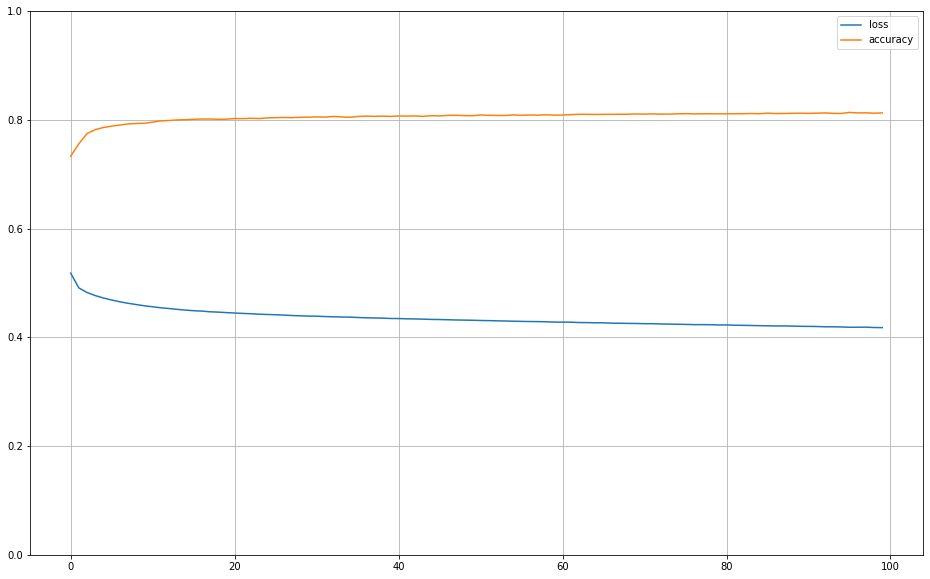

In [101]:
pd.DataFrame(history.history).plot(figsize = (16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [102]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = 'relu'))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))


In [103]:
model.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
            metrics = ["accuracy"])

In [104]:
history = model.fit(X_train, y_train, epochs = 100, 
                   validation_data = (X_valid, y_valid))

Epoch 1/100
2110/2110 [==============================] - 13s 6ms/step - loss: 0.4613 - accuracy: 0.7903 - val_loss: 0.4498 - val_accuracy: 0.7893
Epoch 2/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.4436 - accuracy: 0.8014 - val_loss: 0.4431 - val_accuracy: 0.8008
Epoch 3/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4374 - accuracy: 0.8048 - val_loss: 0.4390 - val_accuracy: 0.7981
Epoch 4/100
2110/2110 [==============================] - 12s 5ms/step - loss: 0.4321 - accuracy: 0.8089 - val_loss: 0.4367 - val_accuracy: 0.8056
Epoch 5/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.4283 - accuracy: 0.8090 - val_loss: 0.4351 - val_accuracy: 0.8035
Epoch 6/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.4245 - accuracy: 0.8113 - val_loss: 0.4360 - val_accuracy: 0.8011
Epoch 7/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4204 - accuracy: 0.8140 - val_loss: 0.4464 -

Epoch 57/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.1961 - accuracy: 0.9169 - val_loss: 1.0592 - val_accuracy: 0.7684
Epoch 58/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.1938 - accuracy: 0.9179 - val_loss: 1.0700 - val_accuracy: 0.7647
Epoch 59/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.1890 - accuracy: 0.9199 - val_loss: 1.0882 - val_accuracy: 0.7745
Epoch 60/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.1889 - accuracy: 0.9220 - val_loss: 1.1112 - val_accuracy: 0.7679
Epoch 61/100
2110/2110 [==============================] - 10s 5ms/step - loss: 0.1865 - accuracy: 0.9216 - val_loss: 1.1059 - val_accuracy: 0.7716
Epoch 62/100
2110/2110 [==============================] - 11s 5ms/step - loss: 0.1829 - accuracy: 0.9233 - val_loss: 1.1443 - val_accuracy: 0.7697
Epoch 63/100
2110/2110 [==============================] - 12s 6ms/step - loss: 0.1804 - accuracy: 0.9252 - val_loss: 1

KeyboardInterrupt: 

#### Stopped early due to overfitting

In [105]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation = "relu"))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
            metrics = ["accuracy"])

In [106]:
history = model.fit(X_train, y_train, epochs = 50, 
                   validation_data = (X_valid, y_valid))

Epoch 1/50
2110/2110 [==============================] - 13s 6ms/step - loss: 0.4645 - accuracy: 0.7878 - val_loss: 0.4442 - val_accuracy: 0.7980
Epoch 2/50
2110/2110 [==============================] - 12s 6ms/step - loss: 0.4473 - accuracy: 0.7997 - val_loss: 0.4434 - val_accuracy: 0.8021
Epoch 3/50
2110/2110 [==============================] - 15s 7ms/step - loss: 0.4426 - accuracy: 0.8026 - val_loss: 0.4578 - val_accuracy: 0.7860
Epoch 4/50
2110/2110 [==============================] - 14s 7ms/step - loss: 0.4379 - accuracy: 0.8050 - val_loss: 0.4440 - val_accuracy: 0.8005
Epoch 5/50
2110/2110 [==============================] - 13s 6ms/step - loss: 0.4343 - accuracy: 0.8066 - val_loss: 0.4384 - val_accuracy: 0.8051
Epoch 6/50
2110/2110 [==============================] - 13s 6ms/step - loss: 0.4314 - accuracy: 0.8094 - val_loss: 0.4354 - val_accuracy: 0.8048
Epoch 7/50
2110/2110 [==============================] - 14s 7ms/step - loss: 0.4284 - accuracy: 0.8103 - val_loss: 0.4376 - val_ac

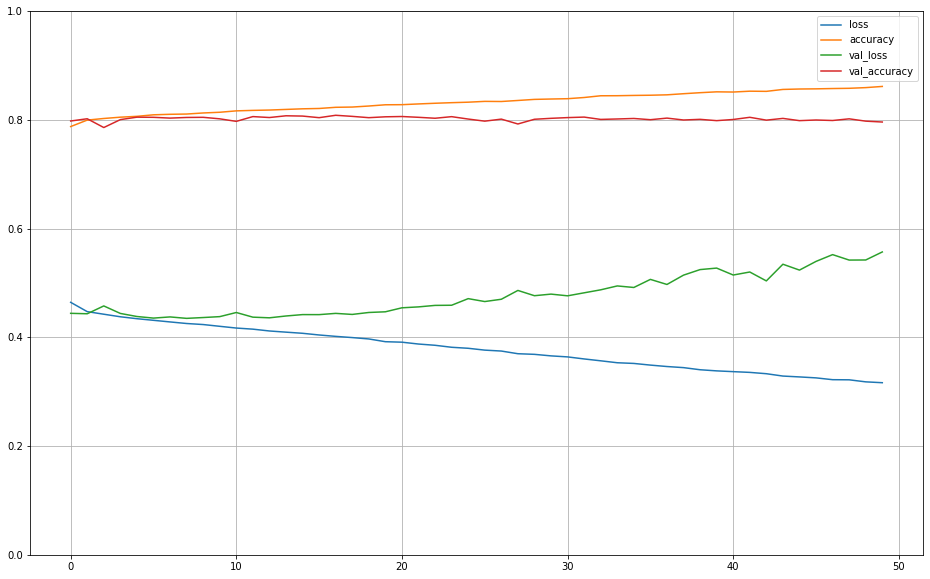

In [107]:
pd.DataFrame(history.history).plot(figsize = (16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [108]:
model.evaluate(X_test_array, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5796 - accuracy: 0.8005


[0.5796203017234802, 0.8004800081253052]

In [114]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim = 300, activation = "relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation = "relu"))
# Add 1 more layer here
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", 
             optimizer = "sgd", 
            metrics = ["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [115]:
history = model.fit(X_train, y_train, epochs = 50, 
                   validation_data = (X_valid, y_valid), callbacks = [es])

Epoch 1/50
2110/2110 [==============================] - 10s 5ms/step - loss: 0.5162 - accuracy: 0.7392 - val_loss: 0.4894 - val_accuracy: 0.7544
Epoch 2/50
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4833 - accuracy: 0.7718 - val_loss: 0.4779 - val_accuracy: 0.7897
Epoch 3/50
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4722 - accuracy: 0.7870 - val_loss: 0.4652 - val_accuracy: 0.7900
Epoch 4/50
2110/2110 [==============================] - 11s 5ms/step - loss: 0.4644 - accuracy: 0.7920 - val_loss: 0.4601 - val_accuracy: 0.7925
Epoch 5/50
2110/2110 [==============================] - 10s 5ms/step - loss: 0.4594 - accuracy: 0.7949 - val_loss: 0.4567 - val_accuracy: 0.7939
Epoch 6/50
2110/2110 [==============================] - 11s 5ms/step - loss: 0.4555 - accuracy: 0.7972 - val_loss: 0.4515 - val_accuracy: 0.7995
Epoch 7/50
2110/2110 [==============================] - 9s 4ms/step - loss: 0.4522 - accuracy: 0.7998 - val_loss: 0.4501 - val_acc

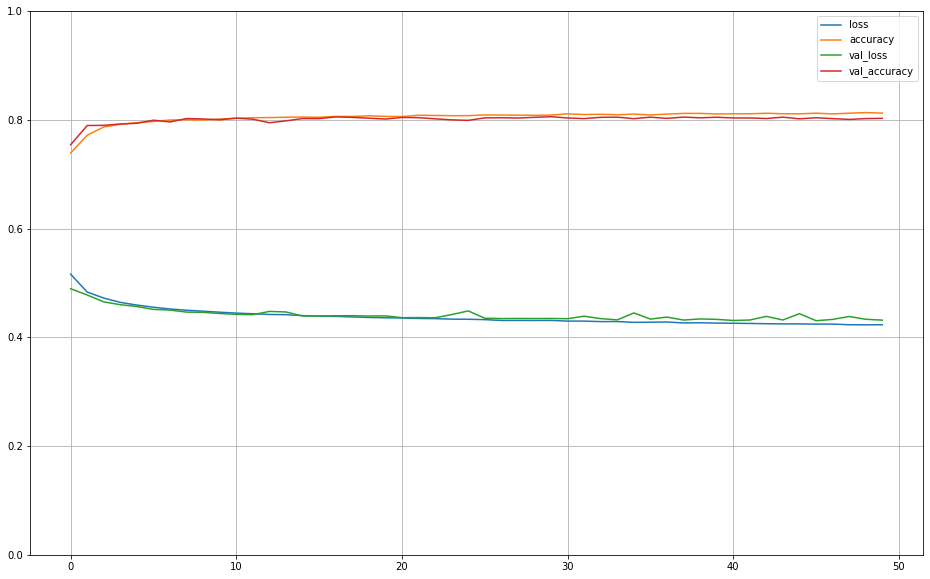

In [116]:
pd.DataFrame(history.history).plot(figsize = (16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [117]:
model.evaluate(X_test_array, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.4334 - accuracy: 0.8096


[0.43342652916908264, 0.8096399903297424]

In [118]:
model.save('sgd_relu_dropout_es.h5')

In [122]:
predictions = model.predict(X_test_array)

### Take a look at predictions

### See a sample of texts: predicted to be unverified

In [244]:
pred_result  = []
pred_prob = []
for i in predictions:
    value = i[0]
    pred_prob.append(value)
    pred_result.append(round(value))

In [245]:
pred_df = pd.DataFrame(y_test)
pred_df['prediction'] = pred_result
pred_df['probability'] = pred_prob

In [246]:
pred_df

verified  prediction  probability
80613         1           1     0.976659
55296         0           0     0.141027
16327         1           1     0.647360
88471         1           1     0.961357
1593          0           0     0.236146
...         ...         ...          ...
41157         1           1     0.829477
844           0           0     0.461186
80684         1           1     0.765651
51172         0           0     0.185476
81480         1           0     0.375768

[25000 rows x 3 columns]

In [188]:
# Subset data where verified status is 1 but model indicates otherwise.
pred_df = pred_df[(pred_df['verified'] == 1) & (pred_df['prediction'] == 0)].sort_values(by = ['probability'])

In [242]:
for i in (pred_df['probability'] < 0.12).index:
    text = data.iloc[i]['reviewText']
    prob = float(pred_df[pred_df.index == i]['probability'])
    print(f'The following review has {round(100*prob, 2)} % probability to be verified.')
    print('-------------------------------------')
    print(text)
    print('-------------------------------------')

The following review has 9.38 % probability to be verified.
-------------------------------------
Somebody Up There Likes Me
  This is the earliest of Newman's work in the seven films making up Warner Home Video's Paul Newman collection.  Each film arrived in its own case embossed with appropriate art work, film credits, major co-stars and copyright date.

  The film is based on the autobiography of Rocky Graziano and was due to star James Dean who died in an automobile accident shortly after filming "Giant".  Newman was under contract to Warner Brothers at the time, which lent him out to MGM to do the part.

  Through the 1950's, American literature was hugely critical of the conformist nature of military service; books like Norman Mailer's The Naked And The Dead took as their theme the suppression of individuality.  In cinema, however, military service was often a search for individuality.  We saw this at work in From Here To Eternity, and much later in An Officer And A Gentleman; th

The following review has 20.96 % probability to be verified.
-------------------------------------
I can't believe I bought this video.  The underlying premise of the movie, a Chinese martial artist marries a Japanese women who exposes her breasts while practicing karate, knocks down walls and destroys objects in her husband's house, refuses to obey her husband and finally removes all of her husband's martial arts equipment and replaces it with her own.  Is this a joke?  In this time period a Japanese (or Chinese) women would do this?  Oh it get's better.  She leaves him and goes back to Japan for comfort from her long time Nina (male) friend.  The husband send a letter to purposes a contest with his wife to see which is better, Chinese or Japanese martial arts.  Her Ninja buddy takes this as a challenge, so he brings nine of his friends to fight the spurned husband.  He must be the first Japanese Ninja coward.  Nine on one.  One of the 'experts' he brings to China has a twitchy mustac

The following review has 26.33 % probability to be verified.
-------------------------------------
This is the third installment of movies about the life of Masutatsu Oyama (played by former student Sonny Chiba) which is loosely based on his exploits. The opening fight scene is worth the price of the dvd alone. Oyama is a drifter who finds himself involved with anything from gangsters to pro wreslers in this one. The wreslers are played by Eddie Sullivan and Rip Tyler. Oyama takes up tag team fighting to make some quick money. He is teamed up with The great Yamashita (played by Hideo Murota) but is disillusioned when he has to throw a fight which goes against his honor. He also befriends a few homeless kids and helps out one of the boys sister who is a hooker. There's also an interesing climax at the end of this movie that can be seen as a salute(not a ripoff)of a famous Bruce Lee film.  It's a good movie and i'm sorry i started the series at the end instead of the beginning. I will be

The following review has 30.71 % probability to be verified.
-------------------------------------
Movie is without question a must see and one of those films that "transends time" although those of us alive in the time can truly appreciate the comedy, tone of the film, and Nic Cage before he "became over the top" and most kids now only know him as the guy who is in so many straight to video red box movies, but at 35 and actually living in AZ when this came out truly brings nostolgia
-------------------------------------
The following review has 30.71 % probability to be verified.
-------------------------------------
"Blade Runner" immediately stood out as a movie with incredible depth -- you BELIEVED in the world Ridley Scott created, it made sense, and it all fit together.  The 2nd disc of this set contains a long documentary (actually several of them) which show how this world was constructed, what went into it, who contributed what and how it all came together to create something 

The following review has 34.32 % probability to be verified.
-------------------------------------
Amnesty is justly known for their meticulously researched documentaries, and this is a fine example. It focuses on one of the internment camps set up during Cambodia's Killing Fields" Pol Pot regime, and interviews a range of people involved in the camp, including survivors. Excellent.
-------------------------------------
The following review has 34.32 % probability to be verified.
-------------------------------------
Like every other season, this one had its ups and downs. It started out feeling rejuvenated and exciting due to the addition of some new characters and interesting plot twists, then halfway through the season, lost some of its steam. For the most part, however, it was quite a fun ride. Season 6 included two of the most exciting events in Smallville's history: the formation of the Justice League, and Lex Luthor finally embracing his dark side and becoming the villian we all

The following review has 37.12 % probability to be verified.
-------------------------------------
I wish I had been less swayed by the positive reviews to watch this movie.  Glad it was only $1.07 and 55 min that I spent on this film...had to turn it off when the plot turned to getting rebels to Iran.  With the cast I had high hopes, unfortunately it had the trifecta of inanity that only works for a Seth Rogen type flick: outlandish plot, foolish dialogue and cartoonish acting.
-------------------------------------
The following review has 37.13 % probability to be verified.
-------------------------------------
Battle of the Bulge is a very good movie --- a little slow in parts; mostly when it tries to show the character (or lack thereof) of Robert Shaw in his private life/thinking --- but overall a good movie.  Maybe it's me, but I don't you see enough of Robert Ryan's character as the general trying to outsmart Shaw's character.  We need a little more depth to him and it's not Ryan

The following review has 39.87 % probability to be verified.
-------------------------------------
This movie was written by Ray Bradbury so it has a great story line.  However, it must have been about the cheapest production of a movie ever made.  The space aliens look so stupid and are not horrible at all.  I would love to see a modern remake of this movie, as the story has a pretty good message about how humans can't be trusted.  It is a "hoot" to watch, though.
-------------------------------------
The following review has 39.87 % probability to be verified.
-------------------------------------
$47 dollars? Almost $50 for a cheap looking DVD set? A cheap looking DVD set that doesn't even include parts of the episodes! Unbelievable. This is a SCAM. Thank goodness I already snatched this up when it was still cheap and also that I own the episodes that my father copied to blank DVDs for me back when the season was still broadcasted on television in the 2008 year. But yes, like others

The following review has 42.37 % probability to be verified.
-------------------------------------
just finished this - and it is definitely going to be a favorite! I think it is a movie you have to give yourself over to, and then watch it a couple of times with a good glass of wine or whatever your favorite beverage may be in order to pick up on what you missed the first viewings. The two main characters of Adam and Eve are marvelous! Yes, it is slow developing, and this is where some audiences will have problems with it. It does not follow the mega-million block busters formula, the plot/ideas are not just given to the viewer, there is no tidy "happily ever after" moment, I loved it but I have always loved the avante-garde films.
-------------------------------------
The following review has 42.4 % probability to be verified.
-------------------------------------
What is there not to like about Nathaniel Parker & The Inspector Lynley Mysteries?  When we finished watching  A Touch of 

The following review has 44.74 % probability to be verified.
-------------------------------------
This is one challenging workout and I only did level1!!! omgee. Since this is a 30 min workout(per level) (not her 1 hr videos) I combo'd this w/ the 6 week abs and I got one heck of a workout. I will say this, level 1 by itself was rough so if you only have 30 min you will still  get a great workout. There were 2 exercises I really couldn't do yet so I just did more of the others to compensate. For the most part though, all the moves can be done , just perhaps a bit more slowly at first. My only grip w/ JM videos is that she doesn't explain the move first, she just jumps in as if you should know the name of the moves and know what they are about. So, the first time through on her vids I have to just watch her then play catch up when a new moves starts. All and all, a great vid to add to the JM collection. I have been using JM on and off for 6 months (mixed w/ gym work) and her workouts r

The following review has 47.99 % probability to be verified.
-------------------------------------
This show just gets better with each season, not for the faint of heart though.
If you like police dramas I highly recommend this one as it's one of the best.
Great writing and characterization are this shows strengths, but the writing can also be its downfall at times with outlandish plots sometimes, but when this show hits it hits good and hard, making up for some of the few absurdities.
-------------------------------------
The following review has 48.0 % probability to be verified.
-------------------------------------
I had seen this production on PBS years ago.  Its a nicely staged production, but I had forgotten how annoying it was when the camera would move from the action on stage to pan the faces of children in the audience.  Its like someone throwing a bucket of water on you while you're in the middle of a nice dream.
-------------------------------------
The following review h

### Sample predicted to be verified

In [243]:
pred_df = pd.DataFrame(y_test)
pred_df['prediction'] = pred_result
pred_df['probability'] = pred_prob

pred_df = pred_df[(pred_df['verified'] == 1) & (pred_df['prediction'] == 1)].sort_values(by = ['probability'], ascending = False)

for i in (pred_df['probability'] > 0.95).index:
    text = data.iloc[i]['reviewText']
    prob = float(pred_df[pred_df.index == i]['probability'])
    print(f'The following review has {round(100*prob, 2)} % probability to be verified.')
    print('-------------------------------------')
    print(text)
    print('-------------------------------------')

The following review has 99.99 % probability to be verified.
-------------------------------------
grest
-------------------------------------
The following review has 99.98 % probability to be verified.
-------------------------------------
Received
-------------------------------------
The following review has 99.98 % probability to be verified.
-------------------------------------
AAAAAAAAAAAA
-------------------------------------
The following review has 99.98 % probability to be verified.
-------------------------------------
graet
-------------------------------------
The following review has 99.96 % probability to be verified.
-------------------------------------
collection
-------------------------------------
The following review has 99.96 % probability to be verified.
-------------------------------------
as ordered
-------------------------------------
The following review has 99.95 % probability to be verified.
-------------------------------------
Stolen
----------------

The following review has 98.97 % probability to be verified.
-------------------------------------
Good item
-------------------------------------
The following review has 98.97 % probability to be verified.
-------------------------------------
Good item
-------------------------------------
The following review has 98.97 % probability to be verified.
-------------------------------------
Added to my collection
-------------------------------------
The following review has 98.97 % probability to be verified.
-------------------------------------
love Robbie Coltrane
-------------------------------------
The following review has 98.97 % probability to be verified.
-------------------------------------
Too old for my 3 yr old grandson
-------------------------------------
The following review has 98.96 % probability to be verified.
-------------------------------------
Nice...
-------------------------------------
The following review has 98.96 % probability to be verified.
------------

The following review has 98.59 % probability to be verified.
-------------------------------------
Item was as described. Happy with purchase.
-------------------------------------
The following review has 98.59 % probability to be verified.
-------------------------------------
Funny
-------------------------------------
The following review has 98.59 % probability to be verified.
-------------------------------------
funny
-------------------------------------
The following review has 98.59 % probability to be verified.
-------------------------------------
funny
-------------------------------------
The following review has 98.59 % probability to be verified.
-------------------------------------
funny
-------------------------------------
The following review has 98.59 % probability to be verified.
-------------------------------------
Funny funny funny
-------------------------------------
The following review has 98.59 % probability to be verified.
-------------------------------

The following review has 98.16 % probability to be verified.
-------------------------------------
awesome movie speedy delivery
-------------------------------------
The following review has 98.16 % probability to be verified.
-------------------------------------
great film
-------------------------------------
The following review has 98.16 % probability to be verified.
-------------------------------------
great film
-------------------------------------
The following review has 98.16 % probability to be verified.
-------------------------------------
Great film
-------------------------------------
The following review has 98.16 % probability to be verified.
-------------------------------------
you need to watch this
-------------------------------------
The following review has 98.16 % probability to be verified.
-------------------------------------
It was good
-------------------------------------
The following review has 98.16 % probability to be verified.
-------------------

The following review has 97.78 % probability to be verified.
-------------------------------------
Thank you
-------------------------------------
The following review has 97.78 % probability to be verified.
-------------------------------------
THANK YOU
-------------------------------------
The following review has 97.78 % probability to be verified.
-------------------------------------
thank you
-------------------------------------
The following review has 97.78 % probability to be verified.
-------------------------------------
Great films
-------------------------------------
The following review has 97.77 % probability to be verified.
-------------------------------------
Interesting stories
-------------------------------------
The following review has 97.77 % probability to be verified.
-------------------------------------
2 thumbs down
-------------------------------------
The following review has 97.77 % probability to be verified.
-------------------------------------
Alw

The following review has 97.61 % probability to be verified.
-------------------------------------
Hysterical.
-------------------------------------
The following review has 97.61 % probability to be verified.
-------------------------------------
It was awful
-------------------------------------
The following review has 97.6 % probability to be verified.
-------------------------------------
it was an OK movie
-------------------------------------
The following review has 97.6 % probability to be verified.
-------------------------------------
It was an ok movie
-------------------------------------
The following review has 97.6 % probability to be verified.
-------------------------------------
Great old movie
-------------------------------------
The following review has 97.6 % probability to be verified.
-------------------------------------
Great old movie
-------------------------------------
The following review has 97.6 % probability to be verified.
---------------------------

-------------------------------------
The following review has 97.38 % probability to be verified.
-------------------------------------
Loved the action!
-------------------------------------
The following review has 97.38 % probability to be verified.
-------------------------------------
Enjoyed the movies.
-------------------------------------
The following review has 97.38 % probability to be verified.
-------------------------------------
Enjoyed the movies.
-------------------------------------
The following review has 97.38 % probability to be verified.
-------------------------------------
Not all that funnt.
-------------------------------------
The following review has 97.38 % probability to be verified.
-------------------------------------
Sex Drive is one of my favorite movies.
-------------------------------------
The following review has 97.38 % probability to be verified.
-------------------------------------
Fun movie to watch.
-------------------------------------
Th

The following review has 97.17 % probability to be verified.
-------------------------------------
100% Satisfied!
-------------------------------------
The following review has 97.17 % probability to be verified.
-------------------------------------
100% Satisfied!
-------------------------------------
The following review has 97.17 % probability to be verified.
-------------------------------------
Cloudy storyline.
-------------------------------------
The following review has 97.17 % probability to be verified.
-------------------------------------
no
-------------------------------------
The following review has 97.17 % probability to be verified.
-------------------------------------
LOVED IT
-------------------------------------
The following review has 97.17 % probability to be verified.
-------------------------------------
loved it
-------------------------------------
The following review has 97.17 % probability to be verified.
-------------------------------------
Loved it

The following review has 96.9 % probability to be verified.
-------------------------------------
It was alright
-------------------------------------
The following review has 96.9 % probability to be verified.
-------------------------------------
It was alright
-------------------------------------
The following review has 96.89 % probability to be verified.
-------------------------------------
Gift for grandson. He loves it.
-------------------------------------
The following review has 96.89 % probability to be verified.
-------------------------------------
Product arrived on time and was as expected - no problems.
-------------------------------------
The following review has 96.89 % probability to be verified.
-------------------------------------
loved the shows
-------------------------------------
The following review has 96.89 % probability to be verified.
-------------------------------------
A gift for my great nephew who loved all of these movies!
-----------------------

The following review has 96.61 % probability to be verified.
-------------------------------------
Big fan of "The Thing" movies.
-------------------------------------
The following review has 96.61 % probability to be verified.
-------------------------------------
I bought this for a friend for Christmas as the one she had was old on VHS and it didn't work any longer. She was very happy to receive in and it came in the fastest time ever and in good condition.
-------------------------------------
The following review has 96.61 % probability to be verified.
-------------------------------------
Gift for my grandson. I think he liked it
-------------------------------------
The following review has 96.61 % probability to be verified.
-------------------------------------
Dwayne Johnson is always good.
-------------------------------------
The following review has 96.61 % probability to be verified.
-------------------------------------
Finally got it blu-ray.
--------------------------

The following review has 96.36 % probability to be verified.
-------------------------------------
Excellent
-------------------------------------
The following review has 96.36 % probability to be verified.
-------------------------------------
EXCELLENT
-------------------------------------
The following review has 96.36 % probability to be verified.
-------------------------------------
Exellent
-------------------------------------
The following review has 96.36 % probability to be verified.
-------------------------------------
Excellent
-------------------------------------
The following review has 96.36 % probability to be verified.
-------------------------------------
excellant
-------------------------------------
The following review has 96.36 % probability to be verified.
-------------------------------------
Excellent
-------------------------------------
The following review has 96.36 % probability to be verified.
-------------------------------------
excellent
----------

The following review has 96.25 % probability to be verified.
-------------------------------------
great storyline throughout
-------------------------------------
The following review has 96.25 % probability to be verified.
-------------------------------------
Just right.
-------------------------------------
The following review has 96.25 % probability to be verified.
-------------------------------------
Not funny
-------------------------------------
The following review has 96.25 % probability to be verified.
-------------------------------------
Not funny
-------------------------------------
The following review has 96.25 % probability to be verified.
-------------------------------------
both cap movies rawked!
-------------------------------------
The following review has 96.25 % probability to be verified.
-------------------------------------
I am a big Cary Grant fan.
-------------------------------------
The following review has 96.25 % probability to be verified.
-------

-------------------------------------
The following review has 96.14 % probability to be verified.
-------------------------------------
Love it
-------------------------------------
The following review has 96.14 % probability to be verified.
-------------------------------------
love it
-------------------------------------
The following review has 96.14 % probability to be verified.
-------------------------------------
love it
-------------------------------------
The following review has 96.14 % probability to be verified.
-------------------------------------
love it
-------------------------------------
The following review has 96.14 % probability to be verified.
-------------------------------------
Love it
-------------------------------------
The following review has 96.14 % probability to be verified.
-------------------------------------
love it
-------------------------------------
The following review has 96.14 % probability to be verified.
-------------------------------

The following review has 95.99 % probability to be verified.
-------------------------------------
All time favorite!
-------------------------------------
The following review has 95.99 % probability to be verified.
-------------------------------------
Great movie, twisted, but Great!
-------------------------------------
The following review has 95.99 % probability to be verified.
-------------------------------------
Classic.  A must have for any library.
-------------------------------------
The following review has 95.99 % probability to be verified.
-------------------------------------
Something is missing
-------------------------------------
The following review has 95.99 % probability to be verified.
-------------------------------------
kind of liked it
-------------------------------------
The following review has 95.98 % probability to be verified.
-------------------------------------
Loved this story as a kid and love it now as an adult. Had to have it in my collection.

The following review has 95.89 % probability to be verified.
-------------------------------------
good
-------------------------------------
The following review has 95.89 % probability to be verified.
-------------------------------------
Good
-------------------------------------
The following review has 95.89 % probability to be verified.
-------------------------------------
Good
-------------------------------------
The following review has 95.89 % probability to be verified.
-------------------------------------
good
-------------------------------------
The following review has 95.89 % probability to be verified.
-------------------------------------
good
-------------------------------------
The following review has 95.89 % probability to be verified.
-------------------------------------
Good
-------------------------------------
The following review has 95.89 % probability to be verified.
-------------------------------------
good
-------------------------------------
The fo

The following review has 95.74 % probability to be verified.
-------------------------------------
Great movie for my collection! Thanks!
-------------------------------------
The following review has 95.74 % probability to be verified.
-------------------------------------
Everything was great! Super service!
-------------------------------------
The following review has 95.74 % probability to be verified.
-------------------------------------
Everything was great! Super service!
-------------------------------------
The following review has 95.74 % probability to be verified.
-------------------------------------
No problems. Fast delivery.
-------------------------------------
The following review has 95.73 % probability to be verified.
-------------------------------------
Expected more substance.
-------------------------------------
The following review has 95.73 % probability to be verified.
-------------------------------------
It was a great movie
-----------------------------

The following review has 95.68 % probability to be verified.
-------------------------------------
Great
-------------------------------------
The following review has 95.68 % probability to be verified.
-------------------------------------
great
-------------------------------------
The following review has 95.68 % probability to be verified.
-------------------------------------
great
-------------------------------------
The following review has 95.68 % probability to be verified.
-------------------------------------
great
-------------------------------------
The following review has 95.68 % probability to be verified.
-------------------------------------
Great
-------------------------------------
The following review has 95.68 % probability to be verified.
-------------------------------------
great
-------------------------------------
The following review has 95.68 % probability to be verified.
-------------------------------------
great
-------------------------------------

The following review has 95.57 % probability to be verified.
-------------------------------------
Good movie
-------------------------------------
The following review has 95.57 % probability to be verified.
-------------------------------------
Good movie
-------------------------------------
The following review has 95.57 % probability to be verified.
-------------------------------------
Good movie
-------------------------------------
The following review has 95.57 % probability to be verified.
-------------------------------------
good movie
-------------------------------------
The following review has 95.57 % probability to be verified.
-------------------------------------
Good movie
-------------------------------------
The following review has 95.57 % probability to be verified.
-------------------------------------
good movie
-------------------------------------
The following review has 95.57 % probability to be verified.
-------------------------------------
Good movie
--

The following review has 95.46 % probability to be verified.
-------------------------------------
Great classic - Have to have it!!
-------------------------------------
The following review has 95.46 % probability to be verified.
-------------------------------------
Bad writing
-------------------------------------
The following review has 95.46 % probability to be verified.
-------------------------------------
It was a cute Christian movie with a message.
-------------------------------------
The following review has 95.46 % probability to be verified.
-------------------------------------
Love the series!
-------------------------------------
The following review has 95.45 % probability to be verified.
-------------------------------------
Twins love it
-------------------------------------
The following review has 95.45 % probability to be verified.
-------------------------------------
I liked this one
-------------------------------------
The following review has 95.45 % proba

The following review has 95.4 % probability to be verified.
-------------------------------------
great movie
-------------------------------------
The following review has 95.4 % probability to be verified.
-------------------------------------
Great movie
-------------------------------------
The following review has 95.4 % probability to be verified.
-------------------------------------
great classic
-------------------------------------
The following review has 95.4 % probability to be verified.
-------------------------------------
Really bad movie...
-------------------------------------
The following review has 95.4 % probability to be verified.
-------------------------------------
VERY Happy!
-------------------------------------
The following review has 95.4 % probability to be verified.
-------------------------------------
great scripts, very good acting and good picture quality
-------------------------------------
The following review has 95.4 % probability to be verifie

The following review has 95.23 % probability to be verified.
-------------------------------------
Arrived as expected and who does not love Charlie Brown?
-------------------------------------
The following review has 95.23 % probability to be verified.
-------------------------------------
x-mas gift for my son thank you.
-------------------------------------
The following review has 95.23 % probability to be verified.
-------------------------------------
Absolutely enjoyed this movie.
-------------------------------------
The following review has 95.23 % probability to be verified.
-------------------------------------
I am so glad that I purchased this pack I have wanted these movies for some time Icould not buy these in australia but thanks to you I am now enjoying them thankyou
-------------------------------------
The following review has 95.23 % probability to be verified.
-------------------------------------
Meh....
-------------------------------------
The following review 

The following review has 95.08 % probability to be verified.
-------------------------------------
our son loved this when he was a child, so we bought another so our grandchildren can enjoy it and we can share with friends
-------------------------------------
The following review has 95.08 % probability to be verified.
-------------------------------------
it was good  episode after episode
-------------------------------------
The following review has 95.07 % probability to be verified.
-------------------------------------
Thank yoy!
-------------------------------------
The following review has 95.07 % probability to be verified.
-------------------------------------
awesome action packed movie
-------------------------------------
The following review has 95.07 % probability to be verified.
-------------------------------------
I loved the stories in the books and really love them on the screen.
-------------------------------------
The following review has 95.07 % probability to

The following review has 94.94 % probability to be verified.
-------------------------------------
This was good!
-------------------------------------
The following review has 94.94 % probability to be verified.
-------------------------------------
Good movie! Really Like Sofia Movies!
-------------------------------------
The following review has 94.94 % probability to be verified.
-------------------------------------
Item arrived on time and without any surprises.
-------------------------------------
The following review has 94.94 % probability to be verified.
-------------------------------------
I feel that any older movie that is transfered from an VHS or even a DVD to a Bluray has superior picture and sound quality and so will YOU!!
-------------------------------------
The following review has 94.93 % probability to be verified.
-------------------------------------
Such an enjoyable movie.
-------------------------------------
The following review has 94.93 % probability to

The following review has 94.71 % probability to be verified.
-------------------------------------
Gotta love those disaster movies. I am a fan and all of these fit the bill. Nice collection and was shipped quickly.
-------------------------------------
The following review has 94.71 % probability to be verified.
-------------------------------------
Super Puppies are loved in our house :)
-------------------------------------
The following review has 94.71 % probability to be verified.
-------------------------------------
Great DVD collection for every Friends fan! This is a must have!
-------------------------------------
The following review has 94.7 % probability to be verified.
-------------------------------------
Very good watch and spy movie
-------------------------------------
The following review has 94.7 % probability to be verified.
-------------------------------------
Should have had a stronger bad guy.
-------------------------------------
The following review has 94.7

The following review has 94.57 % probability to be verified.
-------------------------------------
Great movie!
-------------------------------------
The following review has 94.57 % probability to be verified.
-------------------------------------
Great movie!
-------------------------------------
The following review has 94.57 % probability to be verified.
-------------------------------------
Great movie!
-------------------------------------
The following review has 94.57 % probability to be verified.
-------------------------------------
Great movie!
-------------------------------------
The following review has 94.57 % probability to be verified.
-------------------------------------
Great movie!
-------------------------------------
The following review has 94.57 % probability to be verified.
-------------------------------------
Great movie!
-------------------------------------
The following review has 94.57 % probability to be verified.
-------------------------------------
G

The following review has 94.43 % probability to be verified.
-------------------------------------
Classic flick
-------------------------------------
The following review has 94.43 % probability to be verified.
-------------------------------------
Really enjoyed this movie
-------------------------------------
The following review has 94.43 % probability to be verified.
-------------------------------------
Really enjoyed this movie
-------------------------------------
The following review has 94.43 % probability to be verified.
-------------------------------------
said it was in my mailbox but i was at work and nothing so that sucks
-------------------------------------
The following review has 94.43 % probability to be verified.
-------------------------------------
Love love this show!
-------------------------------------
The following review has 94.42 % probability to be verified.
-------------------------------------
I only watched it because I just found out that my sister-i

The following review has 94.23 % probability to be verified.
-------------------------------------
Great Series!!!!
-------------------------------------
The following review has 94.23 % probability to be verified.
-------------------------------------
I turned it off.
-------------------------------------
The following review has 94.22 % probability to be verified.
-------------------------------------
It is an O.K. Baseball movie but also a chick flick
-------------------------------------
The following review has 94.22 % probability to be verified.
-------------------------------------
Love the show----hate the breathing!!!!
-------------------------------------
The following review has 94.22 % probability to be verified.
-------------------------------------
It's okay.
-------------------------------------
The following review has 94.22 % probability to be verified.
-------------------------------------
I've had enough of high school and movies about high school teachers. This was 

The following review has 94.1 % probability to be verified.
-------------------------------------
Really enjoy the show
-------------------------------------
The following review has 94.1 % probability to be verified.
-------------------------------------
Fun to watch, good effects.
-------------------------------------
The following review has 94.1 % probability to be verified.
-------------------------------------
very entertained. i liked it.
-------------------------------------
The following review has 94.1 % probability to be verified.
-------------------------------------
I enjoy the stories and insight into the Unit.
-------------------------------------
The following review has 94.09 % probability to be verified.
-------------------------------------
Both workouts are challenging and fun.
-------------------------------------
The following review has 94.09 % probability to be verified.
-------------------------------------
very interesting=a great learning tool
---------------

The following review has 93.92 % probability to be verified.
-------------------------------------
Gift
-------------------------------------
The following review has 93.92 % probability to be verified.
-------------------------------------
gift
-------------------------------------
The following review has 93.92 % probability to be verified.
-------------------------------------
Gift
-------------------------------------
The following review has 93.92 % probability to be verified.
-------------------------------------
Gift
-------------------------------------
The following review has 93.92 % probability to be verified.
-------------------------------------
gift
-------------------------------------
The following review has 93.92 % probability to be verified.
-------------------------------------
gift
-------------------------------------
The following review has 93.92 % probability to be verified.
-------------------------------------
gift
-------------------------------------
The fo

The following review has 93.72 % probability to be verified.
-------------------------------------
A blast from my past my child loved it. Glad I was able to find this on here
-------------------------------------
The following review has 93.72 % probability to be verified.
-------------------------------------
Love the series and this DVD set is perfect
-------------------------------------
The following review has 93.72 % probability to be verified.
-------------------------------------
Fun movie for preteens and up.
-------------------------------------
The following review has 93.72 % probability to be verified.
-------------------------------------
A thriller!. Especially the twist at the end!
-------------------------------------
The following review has 93.71 % probability to be verified.
-------------------------------------
a ok ,
I was expecting a bit more
-------------------------------------
The following review has 93.71 % probability to be verified.
----------------------

The following review has 93.54 % probability to be verified.
-------------------------------------
Funny adult rated movie!! Can't beat blu-ray!!
-------------------------------------
The following review has 93.54 % probability to be verified.
-------------------------------------
Wonderfully cast!
-------------------------------------
The following review has 93.54 % probability to be verified.
-------------------------------------
I've bought all other box sets uncut. The cds all come unscratched and the holder is in great condition to hold the cds (sometimes the center is broken and then the cds rattle, but not this). Love the series.
-------------------------------------
The following review has 93.54 % probability to be verified.
-------------------------------------
I am into 3D movies and have a screen and 3D blue ray play and love this movie anyway, but in 3D it was really great.
-------------------------------------
The following review has 93.54 % probability to be verified.

The following review has 93.32 % probability to be verified.
-------------------------------------
Good show.......
-------------------------------------
The following review has 93.32 % probability to be verified.
-------------------------------------
Awesome Movie!!
-------------------------------------
The following review has 93.32 % probability to be verified.
-------------------------------------
Great story line with a fun cast.
-------------------------------------
The following review has 93.32 % probability to be verified.
-------------------------------------
This movie was not as good as the original Transporter series but it was entertaining.
-------------------------------------
The following review has 93.32 % probability to be verified.
-------------------------------------
Uniquely weird love story.
-------------------------------------
The following review has 93.32 % probability to be verified.
-------------------------------------
So delightful - am still enjoying i

The following review has 93.13 % probability to be verified.
-------------------------------------
These are just fun movies to watch.  A two disc set in one container, what could be simpler.
-------------------------------------
The following review has 93.13 % probability to be verified.
-------------------------------------
Both good movies...low budget, but interesting movies.
-------------------------------------
The following review has 93.12 % probability to be verified.
-------------------------------------
don't remember watcing it
-------------------------------------
The following review has 93.12 % probability to be verified.
-------------------------------------
The Year Without A Santa Claus has always been one of my favorites ever since I first saw it on TV! And it also includes Nestor The Long Eared Christmas Donkey and Rudolph's Shiny Year! Two of my other all time favorites!
-------------------------------------
The following review has 93.12 % probability to be verif

The following review has 92.94 % probability to be verified.
-------------------------------------
A great movie series for an even better price.
-------------------------------------
The following review has 92.94 % probability to be verified.
-------------------------------------
Fair entertainment
-------------------------------------
The following review has 92.94 % probability to be verified.
-------------------------------------
Had not seen it in years, but it still held up.  I also like the special features.
-------------------------------------
The following review has 92.93 % probability to be verified.
-------------------------------------
Excellent acting and writing!
-------------------------------------
The following review has 92.93 % probability to be verified.
-------------------------------------
Worth having. A true fan should not pass up the opportunity to have a product so. Product fully recommended. Bye
-------------------------------------
The following review ha

The following review has 92.76 % probability to be verified.
-------------------------------------
<3
-------------------------------------
The following review has 92.76 % probability to be verified.
-------------------------------------
sdmj
-------------------------------------
The following review has 92.76 % probability to be verified.
-------------------------------------
A+
-------------------------------------
The following review has 92.76 % probability to be verified.
-------------------------------------
aaa+++
-------------------------------------
The following review has 92.76 % probability to be verified.
-------------------------------------
xvcb
-------------------------------------
The following review has 92.76 % probability to be verified.
-------------------------------------
adicting
-------------------------------------
The following review has 92.76 % probability to be verified.
-------------------------------------
gp;l8o
-------------------------------------
Th

The following review has 92.55 % probability to be verified.
-------------------------------------
One of the best films ever made.
-------------------------------------
The following review has 92.55 % probability to be verified.
-------------------------------------
Never watched this when it was airing live but I love it and have been watching a few episodes each night
-------------------------------------
The following review has 92.54 % probability to be verified.
-------------------------------------
Decent movie but at times was a little slow.
-------------------------------------
The following review has 92.54 % probability to be verified.
-------------------------------------
A predictably generic series.
-------------------------------------
The following review has 92.54 % probability to be verified.
-------------------------------------
Was not able to stream so really can't review.
-------------------------------------
The following review has 92.54 % probability to be ver

The following review has 92.35 % probability to be verified.
-------------------------------------
Very amusing.
-------------------------------------
The following review has 92.35 % probability to be verified.
-------------------------------------
My father was there under Patton---Great movie----Enjoy very much---Thanks  *****
-------------------------------------
The following review has 92.35 % probability to be verified.
-------------------------------------
Was a long time since I lase watched this movie and forgot just how great it was.  Very happy we purchased it.
-------------------------------------
The following review has 92.35 % probability to be verified.
-------------------------------------
Captivating. Ben Stiller does a great job in this.
-------------------------------------
The following review has 92.35 % probability to be verified.
-------------------------------------
great movies for any ernest fan. and the commercials are just plain fun to watch
--------------

The following review has 92.14 % probability to be verified.
-------------------------------------
@ll perfect. Thanks to Amazon.
-------------------------------------
The following review has 92.14 % probability to be verified.
-------------------------------------
great movie..
-------------------------------------
The following review has 92.14 % probability to be verified.
-------------------------------------
great  movie
-------------------------------------
The following review has 92.14 % probability to be verified.
-------------------------------------
All these years later, The Wire is still one of the finest TV shows, ever
-------------------------------------
The following review has 92.14 % probability to be verified.
-------------------------------------
What a great story line very relevant today.
-------------------------------------
The following review has 92.13 % probability to be verified.
-------------------------------------
A great classic :)
--------------------

The following review has 91.87 % probability to be verified.
-------------------------------------
Very well presented and proves that diabetes can be beat.
-------------------------------------
The following review has 91.87 % probability to be verified.
-------------------------------------
I really think this is a rugby review
-------------------------------------
The following review has 91.87 % probability to be verified.
-------------------------------------
Wow I was so happy when this came and I finally got the last two season so happy now to wait for the nanny
-------------------------------------
The following review has 91.87 % probability to be verified.
-------------------------------------
I like it.
-------------------------------------
The following review has 91.86 % probability to be verified.
-------------------------------------
Very much of its time but a wonderful restoration which deserves our support.
-------------------------------------
The following review ha

The following review has 91.67 % probability to be verified.
-------------------------------------
Very good movie! I really enjoyed this about the life Joseph! Ben Kingsley was outstanding!
-------------------------------------
The following review has 91.66 % probability to be verified.
-------------------------------------
We enjoyed watching and is hope the story continues
-------------------------------------
The following review has 91.66 % probability to be verified.
-------------------------------------
If ur a fan you'll love it. If not ur not a Fan U won't. I must say good memories.
-------------------------------------
The following review has 91.66 % probability to be verified.
-------------------------------------
I love these old movies.  Great on a Sunday or an evening at home.
-------------------------------------
The following review has 91.66 % probability to be verified.
-------------------------------------
Jaden Smith needs another chance to act in a major motion p

The following review has 91.48 % probability to be verified.
-------------------------------------
These were GREAT back in my day.  They're OK today.
-------------------------------------
The following review has 91.48 % probability to be verified.
-------------------------------------
Excellent scyfy, action, thriller of it's type.
-------------------------------------
The following review has 91.48 % probability to be verified.
-------------------------------------
Sorry by I don't appreciate it as much as others have.
-------------------------------------
The following review has 91.47 % probability to be verified.
-------------------------------------
Randolph Scott fans will love this four-in-one.  Four of his best.
-------------------------------------
The following review has 91.47 % probability to be verified.
-------------------------------------
nothing to see here ... move on
-------------------------------------
The following review has 91.47 % probability to be verified.


The following review has 91.24 % probability to be verified.
-------------------------------------
I love this story
-------------------------------------
The following review has 91.24 % probability to be verified.
-------------------------------------
Actual coverage of World War 2. I have bought this one for my son as he is a High School History Teacher, he was always loking at mine, now he has his own.
-------------------------------------
The following review has 91.23 % probability to be verified.
-------------------------------------
Great old TV series. The toes knows....
-------------------------------------
The following review has 91.23 % probability to be verified.
-------------------------------------
Was a gift to my husband.  He really enjoyed it and found it so interesting.  Nature is amazing.
-------------------------------------
The following review has 91.23 % probability to be verified.
-------------------------------------
THESE ARE THE YEARS YOU DREAM OF.SHE WAS A

The following review has 91.04 % probability to be verified.
-------------------------------------
A great classic story. You'll never regret reading it
-------------------------------------
The following review has 91.03 % probability to be verified.
-------------------------------------
I felt like I was watching an updated version of Alien with a splash of background thrown into it. It was ok but not great.
-------------------------------------
The following review has 91.03 % probability to be verified.
-------------------------------------
Was very true to the timing of that era and even worse today!
-------------------------------------
The following review has 91.03 % probability to be verified.
-------------------------------------
Good story, low budget but nice because it was different.
-------------------------------------
The following review has 91.03 % probability to be verified.
-------------------------------------
Great movie! Everyone should watch all of the star wars

The following review has 90.81 % probability to be verified.
-------------------------------------
Season 3 is not as good as the first two, but still worth watching.
-------------------------------------
The following review has 90.8 % probability to be verified.
-------------------------------------
Bought it for my guy.  He wanted to see the movie but missed it.  Happy little adventure for the family.
-------------------------------------
The following review has 90.8 % probability to be verified.
-------------------------------------
Great movie.  My daughter watches a this one a little bit, it isn't her favorite Disney movie but she does enjoy it.
-------------------------------------
The following review has 90.8 % probability to be verified.
-------------------------------------
Series actually from the seventies not the one currently on PBS, but still good.
-------------------------------------
The following review has 90.79 % probability to be verified.
-----------------------

The following review has 90.56 % probability to be verified.
-------------------------------------
Five days was totally absorbing and so well done!
-------------------------------------
The following review has 90.56 % probability to be verified.
-------------------------------------
Entertaining semi conclusion to the series
-------------------------------------
The following review has 90.56 % probability to be verified.
-------------------------------------
Movie was ok.... different plot then I thought but made it thru it!
-------------------------------------
The following review has 90.56 % probability to be verified.
-------------------------------------
Awesome depiction of the book. Lots of fun, great acting.
-------------------------------------
The following review has 90.56 % probability to be verified.
-------------------------------------
It was a fun movie.  The music was especially enjoyable.
-------------------------------------
The following review has 90.55 % probab

The following review has 90.37 % probability to be verified.
-------------------------------------
No negative feedback to provide
-------------------------------------
The following review has 90.37 % probability to be verified.
-------------------------------------
Give me the old Peabody and Sherman nothing compares to the original.
-------------------------------------
The following review has 90.37 % probability to be verified.
-------------------------------------
Not as good as the original, worth it to see the gorgeous Eva Green though.
-------------------------------------
The following review has 90.37 % probability to be verified.
-------------------------------------
best movie ever, not as good as the book but super cool.
-------------------------------------
The following review has 90.37 % probability to be verified.
-------------------------------------
great monster
-------------------------------------
The following review has 90.37 % probability to be verified.
-----

The following review has 90.12 % probability to be verified.
-------------------------------------
This is an awesome movie!  It was loved by the whole family!  I can watch it over and over.  It was really moving and touched my heart.
-------------------------------------
The following review has 90.11 % probability to be verified.
-------------------------------------
This is our second time to watch 24 we own the DVDs.
-------------------------------------
The following review has 90.11 % probability to be verified.
-------------------------------------
an entertaining movie that brought me back to the 1980's. the plot was good and the move was very entertaining.
-------------------------------------
The following review has 90.11 % probability to be verified.
-------------------------------------
Good historical drama.
-------------------------------------
The following review has 90.11 % probability to be verified.
-------------------------------------
Carole Lombard was a very bea

The following review has 89.91 % probability to be verified.
-------------------------------------
So excited for this movie, it's great and a feel good, brand new on time!!
-------------------------------------
The following review has 89.91 % probability to be verified.
-------------------------------------
My daughter and I absolutely LOVE this movie! We bought the soundtrack and listen to it all the time. We saw it twice in the theater and now we've preordered a copy! LOVE LOVE LOVE!!! She's 9 and i'm 39.
-------------------------------------
The following review has 89.91 % probability to be verified.
-------------------------------------
This seemingly copy cat of Olympus Down was a bit too cheesy for me.
-------------------------------------
The following review has 89.91 % probability to be verified.
-------------------------------------
Great movie and a great cause in life to be involved in. God can sure bless many by just blessing 1 person
-----------------------------------

The following review has 89.67 % probability to be verified.
-------------------------------------
Excellent show.
-------------------------------------
The following review has 89.67 % probability to be verified.
-------------------------------------
Okay. Entertaining. Glad I viewed it.
-------------------------------------
The following review has 89.67 % probability to be verified.
-------------------------------------
One of my families favorite Christmas movies. Fresh take on an old story good characters and just makes you laugh and feel good.
-------------------------------------
The following review has 89.67 % probability to be verified.
-------------------------------------
Its Great if you love South Park. These guys are so old now it's kinda sad.
-------------------------------------
The following review has 89.67 % probability to be verified.
-------------------------------------
Good acting plus good story line.
-------------------------------------
The following review h

Its real corny like sharknado halfway thru. Than it gets  better.
-------------------------------------
The following review has 89.47 % probability to be verified.
-------------------------------------
Awesome movie that is so funny while Marilyn makes potato chips even sexy.
-------------------------------------
The following review has 89.47 % probability to be verified.
-------------------------------------
The movie was watchable it kept my attention, but the cover is better.
-------------------------------------
The following review has 89.47 % probability to be verified.
-------------------------------------
Love it.  If you like biographies you will love this one.
-------------------------------------
The following review has 89.47 % probability to be verified.
-------------------------------------
It like new , it ran great , I enjoy it so much. and will for manny years thank you. ART
-------------------------------------
The following review has 89.47 % probability to be veri

The following review has 89.24 % probability to be verified.
-------------------------------------
Great videos the music is a little loud but what a great TV show.
-------------------------------------
The following review has 89.24 % probability to be verified.
-------------------------------------
Five stars. The fantasy is real.
-------------------------------------
The following review has 89.24 % probability to be verified.
-------------------------------------
Awesome movie, makes me want to spend more time in the kitchen.....and make a grilled cheese sandwhich more often.
-------------------------------------
The following review has 89.24 % probability to be verified.
-------------------------------------
Great old war movie where we give em a good old shellacking. Great cast.
-------------------------------------
The following review has 89.24 % probability to be verified.
-------------------------------------
Great all-round film. Good acting. Good story. Good cinematography

Some of the best HBO has done
-------------------------------------
The following review has 89.07 % probability to be verified.
-------------------------------------
I watch Disney with my grand-children. twenty years ago, I watched Disney with my children.  Thirty years ago, I watched Disney with kids I baby sat.  Before that and in between, I watched for myself.  I love the Disney Pixar, they just keep getting better and better.  This is my kind of princess.
-------------------------------------
The following review has 89.07 % probability to be verified.
-------------------------------------
I LOVE THE ORIGINAL SERIES AND THIS DVD FEATURES ALL OF THE BEST AND MOST POPULAR EPISODES!!! AND THE NEW REMASTERED DVD--LOVE IT, LOVE IT, LOVE IT!!!! CAN'T WAIT FOR THE OTHER "BEST OF" DVD'S TO COME OUT!!!
-------------------------------------
The following review has 89.06 % probability to be verified.
-------------------------------------
I thought it was cute and clean. A good chick flick 

The following review has 88.79 % probability to be verified.
-------------------------------------
I loved Fredrick Forsyth and The Day of the Jackal.  The movies are always a little disappointing once you've read the books but this was done very well.
-------------------------------------
The following review has 88.79 % probability to be verified.
-------------------------------------
Very good series but the language needs to be cleaned up a little bit...every other word doesn't need to be an "F" bomb...
-------------------------------------
The following review has 88.79 % probability to be verified.
-------------------------------------
Excellent double feature.  I used to want all of my movies on their own disks.  But now I look for multi movie disks to cut down on storage space.  "Hard Target" is a good one.
-------------------------------------
The following review has 88.79 % probability to be verified.
-------------------------------------
It wasn't what Iexpected. Watched wi

The following review has 88.5 % probability to be verified.
-------------------------------------
This is a wonderful movie...the director did a skillful job creating a film from the exceptionally good novel by the same name.  Highly recommended.
-------------------------------------
The following review has 88.49 % probability to be verified.
-------------------------------------
Outstanding music and a great teaching tool for anyone who needs to learn to stand alone without dependence on anyone but themselves.  Also, a good portrayal of different aspects of "Love.".
-------------------------------------
The following review has 88.48 % probability to be verified.
-------------------------------------
All products were very good.  The Life in Cold Blood wasn't one I would tell people to buy.
-------------------------------------
The following review has 88.48 % probability to be verified.
-------------------------------------
Absolutely nothing similar with the book of the same title.

The following review has 88.18 % probability to be verified.
-------------------------------------
Always a good movie every time I see it!
-------------------------------------
The following review has 88.18 % probability to be verified.
-------------------------------------
Everyone should see this!
-------------------------------------
The following review has 88.17 % probability to be verified.
-------------------------------------
Saw this film at a small theater in Israel in 1980 and thought it was hilarious.  Thirty five years later I think I have changed my mind.  I bought it to show a friend, but I think I've changed my mind on that also.
-------------------------------------
The following review has 88.17 % probability to be verified.
-------------------------------------
War Horse is a great movie. I loved it. Great story...great movie. Worth the money! Cried several times...for the characters, and the horse :(
-------------------------------------
The following review has 8

The following review has 87.91 % probability to be verified.
-------------------------------------
A good, pretty solid superhero/action movie. Might even be better than the first one, or at least as good for sure.
-------------------------------------
The following review has 87.91 % probability to be verified.
-------------------------------------
The book is so good. And this movie did not express how incredibly great the book is. Just go and get the book and enjoyed a great story.
-------------------------------------
The following review has 87.91 % probability to be verified.
-------------------------------------
Love this show! It really made the War of the Roses come to life for me.
-------------------------------------
The following review has 87.91 % probability to be verified.
-------------------------------------
I love this DVD works wonders felt my gluts tightening...had to stop using it for a while due to my pregnancy but can't wait to restart the program
---------------

The following review has 87.61 % probability to be verified.
-------------------------------------
Boring. Not believable.
-------------------------------------
The following review has 87.61 % probability to be verified.
-------------------------------------
I really love this one. Very entertaining and Great music. They were one of
Motown's best groups. I know you will love it.
-------------------------------------
The following review has 87.61 % probability to be verified.
-------------------------------------
This was a very beautiful movie with absolutely great scenery and fine acting.  It was a pleasure to watch and I know now why this movie won so many awards.
-------------------------------------
The following review has 87.61 % probability to be verified.
-------------------------------------
My wife and I usually like her humor. It just seemed repetitive and pushed. Not terrible. Not great.
-------------------------------------
The following review has 87.61 % probability to

The following review has 87.32 % probability to be verified.
-------------------------------------
This is a perfect case study of how not to be a medical professional. There was only one person in th e entire cast who seemed to care about the Patient
-------------------------------------
The following review has 87.32 % probability to be verified.
-------------------------------------
Not interesting enough to finish.
-------------------------------------
The following review has 87.32 % probability to be verified.
-------------------------------------
great collection but no special features to speak of. Can't wait to upgrade to Blu-Ray
-------------------------------------
The following review has 87.31 % probability to be verified.
-------------------------------------
A pretty good yarn with no connection to Greek mythology, however, it was entertaining and D Johnson sense of comic timing was pretty good.
-------------------------------------
The following review has 87.3 % probab

The following review has 86.99 % probability to be verified.
-------------------------------------
Great series, I'm on my 3rd time and watching it. If your a history or military buff it is well worth watching.
-------------------------------------
The following review has 86.98 % probability to be verified.
-------------------------------------
We love this show and it's fun and good to see a different kind of family on
video as well as t.v. You won't be disappointed :)
-------------------------------------
The following review has 86.98 % probability to be verified.
-------------------------------------
This guy makes great graphic novels, and sometimes they turn them into good movies, this could have been amazing, and the leads were, but it should have been darker and V should have been less of a good guy.
-------------------------------------
The following review has 86.98 % probability to be verified.
-------------------------------------
Again Fantastic product, have waited a lon

The following review has 86.56 % probability to be verified.
-------------------------------------
I've always liked the Arthur episodes on PBS and watched them with all the kids. So, to have a movie with Arthur and the gang was a pleasure! Christmas is a time for family, joy and sometimes a helping hand to makes things even better. This movie is one of those. Great for kids of all ages.
-------------------------------------
The following review has 86.56 % probability to be verified.
-------------------------------------
Well one of them anyway.  My first thought after seeing it again is to buy the DVD
-------------------------------------
The following review has 86.56 % probability to be verified.
-------------------------------------
Steve Martin is no Peter sellers  but it was funny.
-------------------------------------
The following review has 86.55 % probability to be verified.
-------------------------------------
Good movie. It's hard to believe what some people do others for

The following review has 86.2 % probability to be verified.
-------------------------------------
Tearjerker with a happy ending.  Good reminder that life can change in seconds,
-------------------------------------
The following review has 86.2 % probability to be verified.
-------------------------------------
Outstanding, and the plot thickens
-------------------------------------
The following review has 86.19 % probability to be verified.
-------------------------------------
the true story of the four seasons! Liked the Broadway show better, but everyone should!
-------------------------------------
The following review has 86.19 % probability to be verified.
-------------------------------------
Raised my kids on this movie...now the grand-kids. Still just as fun to watch. Refreshing to watch a movie with no CGI special effects.
-------------------------------------
The following review has 86.19 % probability to be verified.
-------------------------------------
Had very high h

The following review has 85.88 % probability to be verified.
-------------------------------------
great movie for some reason they would not let me buy it on my computer but I was able to buy it on the TV. Maybe the webpage watcher
-------------------------------------
The following review has 85.88 % probability to be verified.
-------------------------------------
I gave it these many stars because my 3 nephews were cracking up during the movie so muchthat it sent me into  a laughing spree.  It was a great Auntie Sharon movie
-------------------------------------
The following review has 85.88 % probability to be verified.
-------------------------------------
Not bad and a decent show but it was a bit hokey sometimes. Not a realistic portrayal but more of a Hollywood portrayal. Just ok.
-------------------------------------
The following review has 85.87 % probability to be verified.
-------------------------------------
Want a good and fun family movie, then look no further. This 

The following review has 85.52 % probability to be verified.
-------------------------------------
Love Reese Witherspoon and will watch any movie she makes.  Just a fun movie.  Which in this day and age sometimes is a good way to pass an evening.
-------------------------------------
The following review has 85.52 % probability to be verified.
-------------------------------------
Wasn't quite sure what to think of it, needed up really liking it!  Good story and characters. A little slow at times however overall a good movie.
-------------------------------------
The following review has 85.52 % probability to be verified.
-------------------------------------
I always like seeing shows about how the bible in today's would is so meaningful
-------------------------------------
The following review has 85.52 % probability to be verified.
-------------------------------------
This was a good movie but seemed miscast to me.  James McAvoy is not the abusive boyfriend type no matter how go

The following review has 85.14 % probability to be verified.
-------------------------------------
This is an incredible movie. It is a true story and keeps you on the edge of your seat for the whole movie. The acting is great and the story is better than any fiction book.
-------------------------------------
The following review has 85.13 % probability to be verified.
-------------------------------------
Nothing particularly good or bad about this movie, but it was fun to watch.
-------------------------------------
The following review has 85.13 % probability to be verified.
-------------------------------------
fantastic cinematography, interesting suspence and good acting. well done plot that leads you along nicely. i liked the actors, good interaction, believable.
-------------------------------------
The following review has 85.13 % probability to be verified.
-------------------------------------
All action, little substance, fell apart in the end.
----------------------------

The following review has 84.76 % probability to be verified.
-------------------------------------
This is a great DVD for weekday mornings, enough to get you going and make you feel like you've done something for yourself, but at the same time it's not so long that you can't fit it in on a regular morning.
-------------------------------------
The following review has 84.76 % probability to be verified.
-------------------------------------
.GREAT THEME AND ACTORS
-------------------------------------
The following review has 84.75 % probability to be verified.
-------------------------------------
Well done! A fast paced journey across the old west. Solid acting w/ family friendly humor and action underscores the resurrection of these classic characters from the silver screen.
-------------------------------------
The following review has 84.74 % probability to be verified.
-------------------------------------
The plot line was too far fetched and too many of the scenes were filmed 

The following review has 84.29 % probability to be verified.
-------------------------------------
Very under-rated & unknown movie.  No way you can watch this without crying.  Historically & realistically played to perfection.
-------------------------------------
The following review has 84.29 % probability to be verified.
-------------------------------------
I literally remember this movie premiering on television when I was a kid! (Shows you how old I am!!) It's a classic, and a staple at Halloween. Now, me and my daughter can enjoy it!
-------------------------------------
The following review has 84.29 % probability to be verified.
-------------------------------------
Very good movie and Maureen O'Hara was wonderful with her humor and looks! They don't make them like that any more as Hollywood's A list of actresses doesn't compare to the glamor and quality of Maureen O'Hara. Paul Henreid did a wonderful job as the leading man and played off of O'Hara so very well. Must see movi

The following review has 83.81 % probability to be verified.
-------------------------------------
James Garner is one of my most favorite people to watch. I hadn't ever seen this show before but bought it purely out of a desire to watch more of him and I haven't been disappointed. Love it!
-------------------------------------
The following review has 83.81 % probability to be verified.
-------------------------------------
I call it a funny old movie. I remember seeing this when I was in my teens, and wanted to see it again. So, I ordered it... the price was a little steep. About 2 days before I received it, it was aired on TCM... figures! I could have DVR'd it!
-------------------------------------
The following review has 83.81 % probability to be verified.
-------------------------------------
Really think Rowling was pretty writing for just the money for the last two or three books.  The movies were well done the, characters and the actors were pretty much just going through the 

The following review has 83.37 % probability to be verified.
-------------------------------------
This series, I believe will be the gold standard by which other police drama dramas will be judged. Great cast, great chemistry, you can watch any show multiple times and still enjoy and appreciate the story.
-------------------------------------
The following review has 83.35 % probability to be verified.
-------------------------------------
If you liked the first Cloudy at all, you will enjoy this one just as much. It is just as colorful if not more, just as quirky, even more humorous, actually, quite, quite humorous, some new dastardly characters, some adorable ones. It looks so beautiful in HD. You won't be sorry you watched this. :)
-------------------------------------
The following review has 83.35 % probability to be verified.
-------------------------------------
Very decent, but not great movie.  Witherspoon alternates between being impressively good and then being just herself

The following review has 82.73 % probability to be verified.
-------------------------------------
too slow, and some part difficult to understand,too much going on at the same time...but it is only my opinion
-------------------------------------
The following review has 82.73 % probability to be verified.
-------------------------------------
I personally can't stand Barbie so I have never been able to sit and watch it all the way through with my three year old but she has watched it fifteen or more times.  She sings and dances to the songs even when the movie is not playing.  It gets really annoying but I'm glad she's happy.  If you're preschooler loves Barbie, get this, and you won't be disappointed.
-------------------------------------
The following review has 82.73 % probability to be verified.
-------------------------------------
Simcha Jacobovici includes humor as well as information in his presentation of how the Biblical Exodus of the Hebrews from slavery in Egypt might hav

The following review has 82.07 % probability to be verified.
-------------------------------------
Great 1st season.  Not for the easily scared. Not that its that scary but lots of twists!
-------------------------------------
The following review has 82.06 % probability to be verified.
-------------------------------------
again like the first movie it  is hard to sit and watch what the girl goes through, until it becomes  her  time to pay back
-------------------------------------
The following review has 82.06 % probability to be verified.
-------------------------------------
I saw this on at least 3 best movies of the year lists.  Almost too intense for me.  I did think it was very well acted.  And the conflicts well defined.
-------------------------------------
The following review has 82.05 % probability to be verified.
-------------------------------------
Good movie. Has some slow points but worthy of the king of monsters
-------------------------------------
The following re

-------------------------------------
The following review has 81.48 % probability to be verified.
-------------------------------------
I travel to India, and have been attracted to the Vedic culture since childhood. This episode was particularly compelling. I loved XENA television series, it was about time young women had a heroine on television, even if it was a fictitious one
-------------------------------------
The following review has 81.48 % probability to be verified.
-------------------------------------
Lives and people are develop and the dialogue mature and a real picture of how each of us journey and how each is affected by what happens in their lives.

Very meaning full and great maturity for a soap.
-------------------------------------
The following review has 81.48 % probability to be verified.
-------------------------------------
Good movie. As a star trek lover I enjoyed the movie. The only thing I did not like was the portrayal of Kirk in the beginning. Ok he was 

The following review has 80.79 % probability to be verified.
-------------------------------------
Because the series leads one to care about Lewis and Hathaway
it is a gift that Lewis ends with such heart and friendship and sweet touches of humor.
-------------------------------------
The following review has 80.78 % probability to be verified.
-------------------------------------
So far have only watched one episode, but holds promise of being an enthralling prohgram
-------------------------------------
The following review has 80.78 % probability to be verified.
-------------------------------------
We really enjoyed 12 Men of Christmas.  Kristin Chenoweth is a fireball and plays her part so well. The movie was entertaining and touching, with beautiful scenery and a fun story line.
-------------------------------------
The following review has 80.77 % probability to be verified.
-------------------------------------
Of the available 3D titles I have seen this one is the most stunn

The following review has 79.85 % probability to be verified.
-------------------------------------
Not sure how you could just order one movie.  To get the full experience you should order all three extended versions.  So many details were added in the extended versions that it brings it closer to the book.  As you watch the extended scenes you really have to wonder why they were chosen to not be in the theatrical version.  Even if you already own the theatrical version, you really must add the extended versions to your collections.
-------------------------------------
The following review has 79.84 % probability to be verified.
-------------------------------------
Una historia demasiado melodramtica y hasta depresiva me atrevera a decir! Yadhira Carrillo estuvo bien tanto en Cordelia como en Carlota, pero el carcter sumiso y frgil de esta tlima arruin gran parte de la historia: se la comi prcticamente su madre, interpretada por la primera actriz Jacqueline Andere, cuya maldad y fria

The following review has 79.02 % probability to be verified.
-------------------------------------
We felt this was a stinker, despite its "cult" following.
-------------------------------------
The following review has 79.02 % probability to be verified.
-------------------------------------
I enjoyed watching this very much.  There were twist and turns that I didn't expect.  Good storyline, good characters.
-------------------------------------
The following review has 79.02 % probability to be verified.
-------------------------------------
Exquisitely done,  one should allow himself to be ruled by passion. More often than not,you pay the price of your indescretion.
-------------------------------------
The following review has 79.02 % probability to be verified.
-------------------------------------
The Last of the Summer Wine: Christmas Specials is a wonderful DVD, many laughs.
I will be ordering others in this series.
-------------------------------------
The following review has

The following review has 77.92 % probability to be verified.
-------------------------------------
Great movie!  Can't believe I hadn't seen this movie since I like all of the actors in this movie.  Also cool that it was based on a real life event!
-------------------------------------
The following review has 77.91 % probability to be verified.
-------------------------------------
Blessings in Holy Sound-Yeshua !
Yes, I enjoyed the DVD, The Final Battle.....but...there is still a possible....cliff hangar type of ending.
Namaste,
Omody
-------------------------------------
The following review has 77.91 % probability to be verified.
-------------------------------------
There are so many jokes, one-liners and other comments throughout which my wife and I missed by watching it on TV. Once we got the DVD's and started watching it in sequence, we loved it a lot more.
-------------------------------------
The following review has 77.88 % probability to be verified.
-----------------------

The following review has 76.89 % probability to be verified.
-------------------------------------
This is a great family movie!  It has everything...lots of action, very humorous situations, some great learning moments, and lots of amazing things happen to the three main characters - the two uncles and their newly found nephew that just melt your heart while your laughing yourself silly!  Great movie, it's definitely a Friday night with pizza kinda film, WATCH IT!!!!!
-------------------------------------
The following review has 76.86 % probability to be verified.
-------------------------------------
This movie was not at all what I expected. It was raunchy, cussing was bad, and the sexual talk scenes were terrible. Do not watch this with any children around. I was disappointed.
-------------------------------------
The following review has 76.86 % probability to be verified.
-------------------------------------
I absolutely love this series.  I first was exposed to it by checking 

The following review has 75.82 % probability to be verified.
-------------------------------------
Thank you Amazon. SFX were very good but I have seen better. Story line was very much of what is happening in our world today although the bit with the Zombies was a wee over the top. I have seen Brad Pitt do better, (MEET JOE BLACK). Shamus.
-------------------------------------
The following review has 75.81 % probability to be verified.
-------------------------------------
This series gives a view of different interactions between varied types of couples and their difficulties in everyday life. Also gives a perspective of dealing with their lives through a therapist. I can not wait to see next episode. A must see for couples.
-------------------------------------
The following review has 75.8 % probability to be verified.
-------------------------------------
Purchased blu-ray version and after inserting the disk in the player, a standard blu-ray info type screen came up but it wouldn

The following review has 74.64 % probability to be verified.
-------------------------------------
A classic that everyone should be re-watching right now. Remember that it's the Congress that makes laws, and the Executive that is supposed to enforce those laws. Corruption in Congress and special interests are as pertinent a discussion in 1939 as they are now.
-------------------------------------
The following review has 74.63 % probability to be verified.
-------------------------------------
The only thing that saves this movie, is Spader's performance.  Otherwise, very dull.
-------------------------------------
The following review has 74.63 % probability to be verified.
-------------------------------------
For years this movie was hard to find or catch and so when I saw ot was available I gave it to myself for a birthday present. While I enjoy Eleanor Parker and Ronald Reagan in this charming romance, it is Eve Arden who steals the show.  A lot of fun--good company, too.
-------

The following review has 73.28 % probability to be verified.
-------------------------------------
While the first few times I saw this six episode series were confusing, I was able to come to enjoy it. The series only has six episodes (until Adult Swim finishes seasons 2 & 3), so it doesn't take long to watch. Even so, it's an experience you can't pass up.
-------------------------------------
The following review has 73.28 % probability to be verified.
-------------------------------------
A superb, terrifyingly plausible show, tackling our current ethical dilemmas of cloning and genetic engineering.  This is 'propositional Sci-Fi' at its best.  Bravo Canada!  Bravo the BBC!
-------------------------------------
The following review has 73.28 % probability to be verified.
-------------------------------------
It's always funny when it's Adam Sandler ad Drew Barrymore. when I opened the  package, it was a Blu-Ray/DVD two disc combo pack but there wasn't a Digital code present.
-------

The following review has 72.46 % probability to be verified.
-------------------------------------
I was very young when JFK was assassinated but have read many books about this subject.  I think people still want to know what really happened that day.  This movie was great as it brought that day back to life and demonstrated how people were impacted in different ways.  The movie details different events of that day that you didn't see on the news.  One example is how the hospital handles the arrival of the President.  It was a great Sunday afternoon watch.  I am still thinking about the movie and will probably watch it again.
-------------------------------------
The following review has 72.44 % probability to be verified.
-------------------------------------
This movie was not what I thought it was going to be. It is intense. I mean it covers a lot of emotions, but not the ones you expect from the title. I liked it.
-------------------------------------
The following review has 72.4

Enjoyed this movie more than I thought because of the title and authors, I thought it might be a bit depressing.  But no.  Good acting.,
-------------------------------------
The following review has 71.04 % probability to be verified.
-------------------------------------
Excellent story, and acting. The characters were well portrayed by a great cast.
Stay tuned for Guardians of the Galaxy 2 coming soon in 2018 hopefully.
-------------------------------------
The following review has 71.04 % probability to be verified.
-------------------------------------
I liked it a lot !!!  I cannot wait for the next Mattel movies in the upcoming years.
Thank you
-------------------------------------
The following review has 71.04 % probability to be verified.
-------------------------------------
Seriously,  one of THE BEST TV characters ever in my opinion!!!  Raymond Burr just had it down!  Since I wasn't alive during its initial run, I'm catching up with the DVDs.  Classic television!!!!
------

The following review has 69.82 % probability to be verified.
-------------------------------------
The one I had not seen and enjoyed the most was, as it turns out, his debut movie as a main character and where Bette Davis must have been 20 years old, if that!  These were not his best, or most famous roles and I can't say I'd highly recommend purchasing this group of four.  Although, High Sierras is always good. Unlike the Cagney Gangsters, where the group of four were all excellent, whoever made the selections for Bogart's movies should go back to the drawing board.
-------------------------------------
The following review has 69.82 % probability to be verified.
-------------------------------------
My only regret is that there were only 4 episodes. I hear that there may be a movie in the making. Can't wait.
-------------------------------------
The following review has 69.81 % probability to be verified.
-------------------------------------
Marcus Luttrell's story directed by Peter

The following review has 68.7 % probability to be verified.
-------------------------------------
Prayer remix is an absolute must ,& atreat if you enjoy Giglios unique perspective of the WORD!! He again takes us places most Christians are not comfortable with but yet need to visist daily!!
-------------------------------------
The following review has 68.68 % probability to be verified.
-------------------------------------
Recently I found this show on "Reg TV",on M-F 9am-10 on the "THIS" station,I started to watch when I noticed it was filmed on Prince Edward Island where my father grew up & the more I watched the more I liked watching it,now that I see only 4 seasons were made I'm kinda SAD,it's done so nice & the cast are very odd at times,Uncle jimmy reminds me of Forrest Gump,I think if you liked little House or adventures you will enjoy this show...
-------------------------------------
The following review has 68.68 % probability to be verified.
-------------------------------

The following review has 67.28 % probability to be verified.
-------------------------------------
this is a family tradition at halloween. too many young people don't see it anymore! download a script and sing along!
-------------------------------------
The following review has 67.27 % probability to be verified.
-------------------------------------
This is my thought about this Alfred Hitchcock Presents set.
I am extremely happy to be able to finally watch the first season of this show. I have not seen it in years anytime or anywhere on a network station. So far I have enjoyed them without any problems. I mus admit that I do not like double sided disks, but I do own them in such series as THE OUTER LIMITS and GILLIGANS ISLAND. As long as they play without scratching, I'm still okay with it, especially when the price is very reasonable.
I have no complaints about the quality of the programs. Actually, considering how old they are, I believe they look great and I truly enjoy Alfred's

The following review has 66.06 % probability to be verified.
-------------------------------------
I found it entertaining, it fulfilled the trailer's promises.  Definitely worth $5 HD rental.  something I will watch another time or two in my lifetime, but not a new superfave or anything....
-------------------------------------
The following review has 66.05 % probability to be verified.
-------------------------------------
a bizarre movie about nazis invading earth from the dark side of the moon. I thought the movie was strange but I liked it and would recommend to anyone who likes sci-fi and or military.
-------------------------------------
The following review has 66.04 % probability to be verified.
-------------------------------------
This is probably not a movie that would appeal to the younger crowd. I love Blythe Danner as an actress. This is a story of an older womans losses, seeking love(who wouldn't want to do that with Sam Elliott), more losses. It's not action packed bu

I very much liked this.  It takes some understanding of the dumb plots they always seemed to come up with. Once we understand that their lives were in hope of learning a soap opera-type situation that would never happen as being humorous, this makes sense as it is all in fun.  Not for kids.
-------------------------------------
The following review has 64.97 % probability to be verified.
-------------------------------------
It's Ok. It feels too similar to the Insidious movie. Overdone with the evil nun routine, oh wait. It wasn't an evil nun it was an evil spirit dressed like a nun. Really.
-------------------------------------
The following review has 64.97 % probability to be verified.
-------------------------------------
Its ok of a film....
Cooking and factual timing is pretty bad....
Music track is better. Get the music track CD....
Nice story, nobody dies, but few memorable scenes....
-------------------------------------
The following review has 64.94 % probability to be veri

The following review has 63.53 % probability to be verified.
-------------------------------------
This is a good quality scary show for kids. My daughter loved it, as she loves most scary shows, however, I was hesitant as some shows can be just a bit too scary, but this one was just right.  The ghosts/bad guys had some funny lines, which lightened up the situations.  The cast of kids did a nice job acting...all in all, I highly recommend for kids 5 and up.
-------------------------------------
The following review has 63.52 % probability to be verified.
-------------------------------------
One of the great country singers of all time, Loretta Lynn had a lot to do with this movie, as you will find out in her interview in the bonus features. The actrresses did a wonderful job actually singing all the songs on this movie - not dubbed in music from the original Loretta Lynn and Patsy Cline. I'm from an area in Kentucky close to Butcher's Holler and the depictions of the coal mines and th

The following review has 62.17 % probability to be verified.
-------------------------------------
Part of a must-have QUAD-FEATURE. Don't forget to get the OTHER double-feature
that makes a GREAT grave-yard-companion to this double feature:
"Love At First Bite/Once Bitten"

One of the few times that a double-feature release DOESN'T have a stinker. These
movies didn't win any Oscars, true, and they're probably---three of the four movies
I recommend---180-away from the 1931 Dracula flick--- don't stress the -factor, but,
DO have that '80s romantic-horromedy thing going for it. Did you know Nic Cage wanted
to play SUPERMAN? I'll attach a few pix of that... and---unnaturally---ME at Frankenstein
castle's ruins [here in Germany]. ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ Happy Halloween! ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
-------------------------------------
The following review has 62.11 % probability to be verified.
-------------------------------------
Just a quick review - Seinfeld is one of my favorite shows from TV.  A

The following review has 60.64 % probability to be verified.
-------------------------------------
This movie had nothing solid written in it's content...Sometimes a movie can just be entertaining even though the acting was horrific at best...
-------------------------------------
The following review has 60.62 % probability to be verified.
-------------------------------------
I will not bother to write a different review for each Zatoichi movie.  I have all twenty six of his movies and have watched all of them multiple times. Although the believability of a blind swordsman is next to nill, Zatoichi makes it believable because you will fall in love with the character.  Shintaro Katsu is one of my all time favorite actors.
-------------------------------------
The following review has 60.61 % probability to be verified.
-------------------------------------
This movie goes the distance in trying to dispute reports of Lamon being unworthy to guard Lincoln.  I suspect the truth lies some

The following review has 59.39 % probability to be verified.
-------------------------------------
Beautiful in intent, this flawed film is better than many a raved over blockbuster.  It is charming, fun, and full of good will.
-------------------------------------
The following review has 59.39 % probability to be verified.
-------------------------------------
I'm not a huge Gyllenhall fan, or wasn't... but his performance is strong, as is the movie. Combines great drama, action and character studies. The language is over the top at times, but this isn't a family film and doesn't pretend to be. Well acted by the entire cast, this was enjoyable, tense and moving. Highly recommended for those that like some real acting with their action.
-------------------------------------
The following review has 59.35 % probability to be verified.
-------------------------------------
Short and sweet, the movie was a better event at the title than the book title series with the relative titles to s

The following review has 57.16 % probability to be verified.
-------------------------------------
If you're a BMG fan you should get this DVD.  Although it's an updated version of the 2003 Complex Rock Tour, it contains many new songs and stunts.  Make sure you do the setup and select 5.1 sound...the default is for 2 channel stereo.  There are also several "extras" that were not only entertaining, but show many clips from the original Blue Man Group theatrical show.  The 3 BMG originators discuss the origin and philosophy of the BMG characters, and how they were developed and grew.  I missed Tracy Bonham and Venus Hum (who were on the Complex Tour)...but their replacements were great.  Another plus is the CD, which contains the soundtrack from Megastar...audio quality is really good...play it in your car....(loud)  And...as always......when you're watching the DVD, crank up the volume (especially if you have a quality 5.1 surround sound system and a nice flat screen TV.  It's as close

The following review has 55.21 % probability to be verified.
-------------------------------------
i found this too difficult but depends on what you are used to!  Also it goes at such a fast pace that it's hard to follow the first few times because there's no demonstration of what you are about to do - it just goes right into this face paced workout and you are not sure what the next step will be.  I enjoyed it once i'd done it a few times and could follow along with the steps better but still found it too intense for me.  Probably would not purchase again.
-------------------------------------
The following review has 55.2 % probability to be verified.
-------------------------------------
Ryan Reynolds is far from Van Wilder here, but I liked this movie.  Now if I'm only brave enough to go see Deadpool in theaters.. yikes!  Well by golly that's a good film you got here and I like it please and thank you
-------------------------------------
The following review has 55.19 % probabili

The following review has 53.65 % probability to be verified.
-------------------------------------
This brought you back to a sense of the attitude era. It was great to see DX vs the McMahons. It was great seeing Hogan in the ring again keeping his streak at SummerSlam undefeated against The Legend Killer Randy Orton. Great matches on this one. A must have for wrestling fans. Sit back and enjoy.
-------------------------------------
The following review has 53.64 % probability to be verified.
-------------------------------------
With the theme of the movie being getting the church choir in competetion you would not have thought there would be the foul words that were in this movie.  I would not share or recommend this movie to a christian.  You need to be aware of what you are hearing as well as watching.  The movie would have stood on its own without the swearing. ts 4/29/13
-------------------------------------
The following review has 53.64 % probability to be verified.
-----------

The following review has 52.56 % probability to be verified.
-------------------------------------
This is a documentary that has all the right ingredients.  Old colleagues, peers, and rivals reminisce.  There are archival operatic scenes showing the amazing talent of Maria Callas. There is footage of her interviews.

Maria Callas was not only a great soprano but also one of the best operatic actresses I have ever seen.  The "Vissi d'arte" aria alone  (from "Tosca") is worth the price of the DVD.  She was the queen of the most famous opera in the world, La Scala in Milan.

Franco Zefferelli does a wonderful job as narrator. A great director himself, he directed Callas in one of her greatest performances as Tosca.  The documentary also covers her controversial personal life and the loneliness of being a true prima donna.

The interview footage of her shows an elegant, refined woman totally dedicated to her art and her audience.  I rented this first, and after seeing it, ordered it throu

The following review has 50.63 % probability to be verified.
-------------------------------------
If you saw the first Birdemic you will probably love this one....my friends and I did. This movie has some things that mirror the first (no real action until about halfway through, awkwardness, GIF, bad acting, bad editing, bad bad bad....but in a good way) but also has some new stuff (instead of awkwardly long clapping scene we have lots and lots and lots of walking, driving, and showing Hollywood....I won't spoil the other new stuff).

I was a little worried after reading these reviews that the awkwardness would feel forced....it didn't for me. It was another dose of pure perfect bad cinema and the only cure for this......birdemic.
-------------------------------------
The following review has 50.58 % probability to be verified.
-------------------------------------
The series is nearly accurate historically.  It does put some myths to life such as the death of George the Duke of Claren

In [249]:
pred_df[0:5].index

Int64Index([80613, 55296, 16327, 88471, 1593], dtype='int64')

In [329]:
summary = pred_df.sort_values(by = (['probability']))

In [331]:
summary.reset_index(inplace = True)

In [332]:
summary['all_count'] = summary['verified'].rolling(25000).count()
summary['all_percent'] = summary['all_count'] / len(summary)

C:\Users\wang-\ML\my_env\lib\site-packages\pandas\core\window\rolling.py:1606: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  warnings.warn(


In [339]:
summary['unverified_count'] = 0
copy = summary.copy()

In [340]:
count = 0
for i in range(len(summary)):
    if copy.iloc[i]['verified'] == 0:
        count += 1
    summary['unverified_count'].iloc[i] = count

C:\Users\wang-\ML\my_env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [359]:
summary['unverified_percent'] = round(summary['unverified_count'] / 6591, 2)

In [365]:
# top_percentages = summary[['all_percent', 'unverified_percent']]
top_percentages = summary.copy()

In [368]:
top_percentages = top_percentages[top_percentages['unverified_percent'].isin([0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])].groupby('unverified_percent').first()

### Show result of lift : how many reviews to be marked to cover 1%, 3%, 5%, 10%... of all false reviews

In [369]:
top_percentages[['probability', 'all_percent']]

probability  all_percent
unverified_percent                          
0.01                   0.104847      0.00272
0.03                   0.122591      0.00896
0.05                   0.138008      0.01556
0.10                   0.163524      0.03136
0.20                   0.214259      0.06436
0.30                   0.269709      0.10040
0.40                   0.338754      0.14032
0.50                   0.424574      0.18888

In [337]:
summary

index  verified  prediction  probability  all_count  all_percent
0      61095         0           0     0.074578        1.0      0.00004
1      62369         0           0     0.077612        2.0      0.00008
2      67837         0           0     0.078881        3.0      0.00012
3      33079         0           0     0.080489        4.0      0.00016
4      60486         0           0     0.082167        5.0      0.00020
...      ...       ...         ...          ...        ...          ...
24995   9606         1           1     0.999620    24996.0      0.99984
24996  13618         1           1     0.999753    24997.0      0.99988
24997  23985         1           1     0.999773    24998.0      0.99992
24998  97131         1           1     0.999782    24999.0      0.99996
24999  45616         1           1     0.999870    25000.0      1.00000

[25000 rows x 6 columns]